In [1]:
# To display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Please make sure Jupyter Notebook environment is running a Python 3 kernel 
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting graphs 
import seaborn as sns # used for plot interactive graph.
import sklearn as sk
from scipy import stats
# statistical analysis

Autosaving every 120 seconds


## TOC:
* [January](#jan)
* [February](#feb)
* [March](#mar)
* [First Quarter](#fqa)

* [April](#apr)
* [May](#may)
* [June](#jun)
* [Second Quarter](#sqa)

* [July](#jul)
* [August](#aug)
* [September](#sep)
* [Third Quarter](#tqa)
* [October](#oct)
* [November](#nov)
* [Final Quarter](#fiqa)
* [Full Year Average](#fya)

In [3]:
df_inputs = pd.read_csv('fscData/fscDataInputsCleanedFinal.csv')
df_agg = pd.read_csv('fscData/fscDataAggCleaned.csv')
df_fin = pd.read_csv('fscData/fscDataFinCleaned.csv')
df_mech = pd.read_csv('fscData/fscDataMechCleaned.csv')
df_ind = pd.read_csv('fscData/fscDataIndivCleaned.csv')

In [4]:
df_inputs.head()
df_agg.head()
df_fin.head()
df_mech.head()
df_ind.head()

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
0,Tharaka Nithi,1,2,Magdalene Kiarie,Profen,Crop Protection,Pest And Desease Control,Agrichem Africa Limited,Mls,100,600,0
1,Tharaka Nithi,1,2,Magdalene Kiarie,Booster,Crop Nutrition,Foliar,Agrosolutions Ltd,Mls,750,950,0
2,Busia,4,1,Samwels Magoba,Local Soya Seed,Seeds,Seeds,Local Soya Seed,Kgs,80,8000,800
3,Tharaka Nithi,1,2,Magdalene Kiarie,Herbistar,Crop Protection,Herbicide,Gov Pl,Mls,200,2200,0
4,Tharaka Nithi,1,2,Magdalene Kiarie,Escort,Crop Protection,Pest And Desease Control,Greenlife,Mls,600,3850,0


,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
0,Nakuru,8,1,MIKE TESOT,Potatoes,11250,11250,11.25,Joel Tum,21.0,236250,7500,2,0,2
1,Nakuru,8,1,MIKE TESOT,Potatoes,25500,25500,25.50,Joel Tum,21.0,535500,"17,000",3,2,5
2,Nakuru,8,1,ALEX MACHARIA,Potatoes,37500,37500,37.50,David Murosi,21.0,787500,25000,4,1,5
3,Nakuru,8,1,ALEX MACHARIA,Potatoes,22500,22500,22.50,JOSEPH WAMBUGU,20.0,450000,"15,000",1,2,3
4,Nakuru,8,1,ALEX MACHARIA,Potatoes,15000,15000,15.00,JOSEPH WAMBUGU,21.0,315000,10000,1,2,3


,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
0,Meru,1,4,Isabella Paul,Sunculture,4,625000,19,18430
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,OAF,11,54564,11,0
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
4,Nakuru,2,4,Lily Cherotich,Mokuns Sacco,20,"100,000",0,0


,County,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Value,Commision Earned,Male,Female,Total
0,Busia,1,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.0,58800,2100,3,2,5.0
1,Busia,1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.0,36400,1300,2,2,4.0
2,Busia,1,2,Florence Nabwire,Michael ochieng,Mechanisation,Ploughing,8.0,22400,800,1,3,4.0
3,Busia,1,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.0,7500,300,3,0,3.0
4,Busia,1,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.0,2800,100,1,0,1.0


,name,County,input_value,input_comm,mech_value,mech_comm,agg_total,agg_comm,fin_value,fin_comm,grand_total,grand_total_commission
0,Godfrey Mwongora,Meru,"5,405,652","79,100","29,000",0,"88,979,000","371,000","141,000",0,"94,554,652","450,100"
1,Solomon Muthee,Meru,"71,215","6,885",0,0,"59,226,247","2,627,252","395,000","1,000","59,692,462","2,635,137"
2,Abraham Nganga,Nyandarua,"14,337,110","2,298,138","675,500","73,700","23,418,994","1,047,325","300,000",0,"38,731,604","3,419,163"
3,Lily Cherotich,Nakuru,"2,467,250","116,604","30,000","2,400","35,886,300","2,036,750","100,000",0,"38,483,550","2,155,754"
4,Everest Ogembo,Migori,"75,650","2,040",0,0,"29,866,098","72,536",0,0,"29,941,748","74,576"


In [5]:
common = set.intersection(set(df_inputs.fscName), set(df_agg.fscName), set(df_mech.fscName), set(df_fin.fscName))
print(common)

set()


In [6]:
#pd.concat([
  #  df1[df1.Col1.isin(common)],
 #   df2[df2.Col1.isin(common)],
   # df3[df3.Col1.isin(common)]]).sort_values(by='Col1')

In [7]:
df_inputs.sort_values(by=['Commision Earned','Month'])

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
0,Tharaka Nithi,1,2,Magdalene Kiarie,Profen,Crop Protection,Pest And Desease Control,Agrichem Africa Limited,Mls,100,600,0
1,Tharaka Nithi,1,2,Magdalene Kiarie,Booster,Crop Nutrition,Foliar,Agrosolutions Ltd,Mls,750,950,0
3,Tharaka Nithi,1,2,Magdalene Kiarie,Herbistar,Crop Protection,Herbicide,Gov Pl,Mls,200,2200,0
4,Tharaka Nithi,1,2,Magdalene Kiarie,Escort,Crop Protection,Pest And Desease Control,Greenlife,Mls,600,3850,0
5,Tharaka Nithi,1,2,Magdalene Kiarie,Integra,Crop Protection,Pest And Desease Control,Greenlife,Mls,100,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13192,Nyandarua,10,3,Abraham Nganga,Clean Poatato Seeds,Seeds,Seeds,Clean Potato Seed,Kgs,26500,1590000,265000
9558,Nakuru,7,4,Salome Mwangi,Clean Poatato Seeds,Seeds,Seeds,Clean Potato Seed,Kgs,8000,400000,280000
13194,Nyandarua,11,4,Abraham Nganga,Clean Poatato Seeds,Seeds,Seeds,Clean Potato Seed,Kgs,32500,1950000,325000
9925,Nakuru,10,1,Salome Mwangi,Clean Poatato Seeds,Seeds,Seeds,Clean Potato Seed,Kgs,17500,875000,350000


In [8]:
replace_values = {0:np.nan}
df_inputs['Commision Earned'] = df_inputs['Commision Earned'].replace(replace_values)
df_inputs.sort_values(by=['Commision Earned','Month'])
df_inputs.isnull().sum()
df_inputs = df_inputs.dropna()
df_inputs

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
354,Migori,3,1,Alice Obare,Maize H513 Series,Seeds,Seeds,Kenya Seed,Kgs,6,1500,1.0
355,Migori,10,1,Samuel Baberi,Amprolium,Livestock Product,Livestock Product,Kepro,Mls,200,30,1.0
356,Migori,10,4,Jacob Owuor Oketch,Tomato Prime,Seeds,Seeds,Simlaw,Grams,500,70,1.0
357,Homabay,11,3,Bernard Oweke,Easygrow,Crop Nutrition,Foliar,Osho Chemical Industries Ltd,Mls,500,300,1.0
364,Kisumu,2,3,Samson Opiyo,Yara Mila Power,Crop Nutrition,Fertilizers,Yara,Kgs,250,17000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
348,Nyandarua,11,4,Samson Mburu,Baraka Fertilizers,Crop Nutrition,Fertilizers,Toyota Shusho,Kgs,2100,137340,NaN
349,Nyandarua,11,4,Samson Mburu,Baraka Fertilizers,Crop Nutrition,Fertilizers,Toyota Shusho,Kgs,1050,78960,NaN
350,Nyandarua,11,4,Samson Mburu,Baraka Fertilizers,Crop Nutrition,Fertilizers,Toyota Shusho,Kgs,200,13080,NaN
3366,Elgeyo Marakwet,11,3,Susemo Women Group,Apical Root Cuttings,Seeds,Seeds,Apical Root Cuttings,Pieces,250,3750,NaN


County                0
Month                 0
Week                  0
fscName               0
inputName             0
Category              0
Type                  0
companyInvolved       0
unit                  0
Quantity              0
Value                 0
Commision Earned    358
dtype: int64

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
2,Busia,4,1,Samwels Magoba,Local Soya Seed,Seeds,Seeds,Local Soya Seed,Kgs,80,8000,800.0
9,Homabay,3,4,Selemiah Ochieng,Sorghum Gadam,Seeds,Seeds,Karlo,Kgs,58,11600,290.0
16,Nakuru,7,5,Salome Mwangi,Clean Poatato Seeds,Seeds,Seeds,Clean Potato Seed,Kgs,8000,480000,360.0
18,Homabay,9,1,Selemiah Ochieng,Sc Sungura,Seeds,Seeds,Seedco,Kgs,106,26500,1325.0
27,Migori,6,3,Robert Nyanjwa,Collards Simlaw,Seeds,Seeds,Simlaw,Grams,25,100,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13193,Kisumu,3,1,Samson Opiyo,Dk Maize Series,Seeds,Seeds,Bayer Monsanto,Kgs,80,18000,1000.0
13194,Nyandarua,11,4,Abraham Nganga,Clean Poatato Seeds,Seeds,Seeds,Clean Potato Seed,Kgs,32500,1950000,325000.0
13195,Kisumu,1,5,Samson Opiyo,Dk Maize Series,Seeds,Seeds,Bayer Monsanto,Kgs,234,52650,1170.0
13196,Kisumu,3,3,Samson Opiyo,Dk Maize Series,Seeds,Seeds,Bayer Monsanto,Kgs,140,33600,2100.0


In [9]:
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12843 entries, 2 to 13199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            12843 non-null  object 
 1   Month             12843 non-null  int64  
 2   Week              12843 non-null  int64  
 3   fscName           12843 non-null  object 
 4   inputName         12843 non-null  object 
 5   Category          12843 non-null  object 
 6   Type              12843 non-null  object 
 7   companyInvolved   12843 non-null  object 
 8   unit              12843 non-null  object 
 9   Quantity          12843 non-null  object 
 10  Value             12843 non-null  int64  
 11  Commision Earned  12843 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.3+ MB


In [10]:
com_mth = df_inputs.sort_values(['Commision Earned'], ascending=False)

In [11]:
com_mth.info()
com_mth = com_mth[['Month','Week','fscName','Category','Type','Quantity','Commision Earned','Value']]

#com_mth['serviceProviderName'] = com_mth['serviceProviderName'].replace(replace_values)
#com_mth['Commision Earned'] = (com_mth['Commision Earned'].str.split())
#com_mth.astype({'Commision Earned': 'int64'}).dtypes
#com_mth['Value'] = (com_mth['Value'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
com_mth.astype({'Value':'float64'}).dtypes
com_mth.astype ({'Week':'float64'}).dtypes
com_mth

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12843 entries, 9948 to 354
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            12843 non-null  object 
 1   Month             12843 non-null  int64  
 2   Week              12843 non-null  int64  
 3   fscName           12843 non-null  object 
 4   inputName         12843 non-null  object 
 5   Category          12843 non-null  object 
 6   Type              12843 non-null  object 
 7   companyInvolved   12843 non-null  object 
 8   unit              12843 non-null  object 
 9   Quantity          12843 non-null  object 
 10  Value             12843 non-null  int64  
 11  Commision Earned  12843 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.3+ MB


Month                 int64
Week                  int64
fscName              object
Category             object
Type                 object
Quantity             object
Commision Earned    float64
Value               float64
dtype: object

Month                 int64
Week                float64
fscName              object
Category             object
Type                 object
Quantity             object
Commision Earned    float64
Value                 int64
dtype: object

,Month,Week,fscName,Category,Type,Quantity,Commision Earned,Value
9948,8,2,Salome Mwangi,Seeds,Seeds,14000,630000.0,840000
9925,10,1,Salome Mwangi,Seeds,Seeds,17500,350000.0,875000
13194,11,4,Abraham Nganga,Seeds,Seeds,32500,325000.0,1950000
9558,7,4,Salome Mwangi,Seeds,Seeds,8000,280000.0,400000
13192,10,3,Abraham Nganga,Seeds,Seeds,26500,265000.0,1590000
...,...,...,...,...,...,...,...,...
6602,8,2,Judith Oketch,Seeds,Seeds,10,2.0,2500
357,11,3,Bernard Oweke,Crop Nutrition,Foliar,500,1.0,300
356,10,4,Jacob Owuor Oketch,Seeds,Seeds,500,1.0,70
355,10,1,Samuel Baberi,Livestock Product,Livestock Product,200,1.0,30


In [12]:
show = com_mth['fscName'].tolist()
show

['Salome Mwangi',
 'Salome Mwangi',
 'Abraham Nganga',
 'Salome Mwangi',
 'Abraham Nganga',
 'Margaret Mungai',
 'Margaret Mungai',
 'Abraham Nganga',
 'Purity Gatiria',
 'Abraham Nganga',
 'Florence Tum',
 'Margaret Mungai',
 'Purity Gatiria',
 'Mike Tesot',
 'Abraham Nganga',
 'Abraham Nganga',
 'Margaret Mungai',
 'Jason Maragu',
 'Joseph Ngugi',
 'Salome Mwangi',
 'Salome Mwangi',
 'Abraham Nganga',
 'Abraham Nganga',
 'Abraham Nganga',
 'Margaret Mungai',
 'Joseph Ndirangu',
 'Margaret Mungai',
 'Thomas Chepkwony',
 'Peter Kiragu',
 'Margaret Mungai',
 'Salome Mwangi',
 'Margaret Mungai',
 'Salome Mwangi',
 'Samuel Kuria',
 'Salome Mwangi',
 'Rose Wagari',
 'Annete Kaari',
 'Godfrey Mwongora',
 'Shadrack Okuku',
 'Robert Opar',
 'Robert Koskei',
 'Jacob Muriugi',
 'Jason Maragu',
 'David Onyunde',
 'Abraham Nganga',
 'Margaret Mungai',
 'Abraham Nganga',
 'Rufus Sirere Yenko',
 'Judith Kiende',
 'Purity Gatiria',
 'Jason Maragu',
 'Rose Wagari',
 'Margaret Mungai',
 'Festus Kinyua

In [13]:
com_mth['Type'].unique()

array(['Seeds', 'Hermetic', 'Tarpaulins', 'Fertilizers', 'Fertiizers',
       'Pest And Desease Control', 'Herbicide', 'Foliar',
       'Livestock Product', 'Other', 'Sacks', 'Equipment', 'Seedlings'],
      dtype=object)

In [14]:
typeValues = {'other : Other',
              'Fertiizers : Fertilizers',
               }
com_mth['Type'] = com_mth['Type'].replace(typeValues)

In [15]:
Fer = com_mth[com_mth['Type'] == 'Fertiizers']
Fer


,Month,Week,fscName,Category,Type,Quantity,Commision Earned,Value
13160,10,3,Annete Kaari,Crop Nutrition,Fertiizers,11150,66900.0,669000
13127,10,3,Purity Gatiria,Crop Nutrition,Fertiizers,139500,27900.0,8370000
12586,10,4,Purity Gatiria,Crop Nutrition,Fertiizers,2500,5000.0,142500
11406,10,3,Mercy Kaari,Crop Nutrition,Fertiizers,20,2000.0,44000
10776,10,3,Hellen Kinyua,Crop Nutrition,Fertiizers,14,1400.0,30800


In [16]:
com_mth.groupby('fscName')['Type'].nunique()

fscName
Abdi Opwaka        3
Abraham Nganga     5
Agnes Cherono      4
Agnes Kathure      1
Alex Macharia      5
                  ..
Willis Omondi      7
Wycliff Ochieng    2
Wycliff Ojal       6
Wycliffe Bet       3
Zachary Mwenda     3
Name: Type, Length: 340, dtype: int64

In [17]:
fscNamesUgh = { 'ALEX MACHARIA' : 'Alex Macharia',
                'ali Otini' : 'Ali Otini',
                'AMOS MAGERO':'Amos Magero',
                'ANGELINE ATSIENO':'Angeline Atsieno',
                'BERNARD OWEKE' : 'Bernard Oweke',
                'CALEB ODHIAMBO' : 'Caleb Odhiambo',
                'David onyude': 'David Onyude',
                'DAVID ONYUDE' : 'David Onyude',
                'DOMINIC OKUNGU': 'Dominic Okungu',
                'DOUGLAS KIPLETAN': 'Douglas Kipletan',
                'ELDER MARIAMU OMURAYI': 'Elder Mariamu Omurayi',
                'EMILLY AKINYI' : 'Emilly Akinyi',
                'ENOCK OKEYO' : 'Enock Okeyo',
                'EUNICE AKINYI' : 'Eunice Akinyi',
                'FRANCIS OPERE' : 'Francis Opere',
                'GEOFFREY KUNGU' : 'Geoffrey Kungu',
                'HANS KHANDO' : 'Hans Khando',
                'JAMES ONYANGO' : 'James Onyango',
                'JOAN CHESEREM' : 'Joan Cheserem',
                'JOHN ABUNERI OMUKATU' : 'John Abuneri Omukatu',
                'JOHN KOILEKEN' : 'John Koileken',
                'JOHN NYAMBURI' : 'John Nyamburi',
                'JOSEPH NYALANDO' : 'Joseph Nyalando',
                'JOSEPH ODWAR' : 'Joseph Odwar',
                'JUDITH OCHUODHO' : 'Judith Ochuodho',
                'Julia marungu' : 'Julia Marungu',
                'julia marungu' : 'Julia Marungu',
                'KEPHERS OGOLA' : 'Kephers Ogola',
                'Lazarus owade' : 'Lazarus Owade',
                'LEANAH MWANGI' : 'Leanah Mwangi',
                'LUCAS ONYANGO' : 'Lucas Onyango',
                'MARK MWENDIA'  : 'Mark Mwendia',
                'MARLONE AWILLIE' : 'Marlone Awillie',
                'martin Makhoka' : 'Martin Makhoka',
                'MARTIN MAKHOKA' : 'Martin Makhoka',
                'MARTIN OLOO JUMA' : 'Martin Oloo Juma',
                'MILLICENT ATIENO' : 'Millicent Atieno',
                'NOAH OWUOR' : 'Noah Owuor',
                'NOAH RONO' : 'Noah Rono',
                'NOBERT OGUTU' : 'Nobert Ogutu',
                'PAUL KURIA' : 'Paul Kuria',
                'PAUL OCHIENG OMOLLO' : 'Paul Ochieng Omollo',
                'PETER TANYASIS' : 'Peter Tanyasis',
                'PHYLIS OLENDO' : 'Phylis Olendo',
                'Phylis olendo' : 'Phylis Olendo',
                'Robert koskei' : 'Robert Koskei',
                'ROBERT NYANJWA' : 'Robert Nyanjwa',
                'SAMMY SANG' : 'Sammy Sang',
                'Samson opiyo' : 'Samson Opiyo',
                'SAMSON OPIYO' : 'Samson Opiyo',
                'SAMUEL NYAPOLA' : 'Samuel Nyapola',
                'shadrack okuku' : 'Shadrack Okuku',
                'Stella muthee' : 'Stella Muthee',
                'STELLA MUTHEE' : 'Stella Muthee',
                'SYLVESTER OWINO' : 'Sylvester Owino',
                'TITUS KIMATHI' : 'Titus Kimathi',
                'WILLIAM OBOTE' : 'William Obote',
                'WILLIS OMONDI' : 'Willis Omondi',
                'WYCLIFFE BET'  : 'Wycliffe Bet'
                }
com_mth['fscName'] = com_mth['fscName'].replace(fscNamesUgh)

In [18]:
com_mth

,Month,Week,fscName,Category,Type,Quantity,Commision Earned,Value
9948,8,2,Salome Mwangi,Seeds,Seeds,14000,630000.0,840000
9925,10,1,Salome Mwangi,Seeds,Seeds,17500,350000.0,875000
13194,11,4,Abraham Nganga,Seeds,Seeds,32500,325000.0,1950000
9558,7,4,Salome Mwangi,Seeds,Seeds,8000,280000.0,400000
13192,10,3,Abraham Nganga,Seeds,Seeds,26500,265000.0,1590000
...,...,...,...,...,...,...,...,...
6602,8,2,Judith Oketch,Seeds,Seeds,10,2.0,2500
357,11,3,Bernard Oweke,Crop Nutrition,Foliar,500,1.0,300
356,10,4,Jacob Owuor Oketch,Seeds,Seeds,500,1.0,70
355,10,1,Samuel Baberi,Livestock Product,Livestock Product,200,1.0,30


In [19]:
#com_mth.to_csv('testBook.csv',index = False, header=True)

# JANUARY <a class="anchor" id="jan"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4630,2,Elder Mariamu Omurayi,Tarpaulins,Tarpaulins,1,200.0,2200
9908,2,Peter Adede,Tarpaulins,Tarpaulins,5,1000.0,12000
4632,2,Phylis Olendo,Tarpaulins,Tarpaulins,2,200.0,4400
3883,2,Lazarus Owade,Crop Protection,Pest And Desease Control,300,150.0,2250
10652,2,Samson Opiyo,Tarpaulins,Tarpaulins,13,1300.0,28600
...,...,...,...,...,...,...,...
7656,5,David Mwikamba,Crop Protection,Pest And Desease Control,1400,440.0,6300
7916,5,David Mwikamba,Crop Protection,Pest And Desease Control,2000,485.0,7250
7941,5,Morris Olaba,Hermetic,Hermetic,20,500.0,4500
5792,5,Ali Otini,Crop Nutrition,Fertilizers,250,250.0,15500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4630,2,Elder Mariamu Omurayi,Tarpaulins,Tarpaulins,1,200.0,2200
9908,2,Peter Adede,Tarpaulins,Tarpaulins,5,1000.0,12000
4632,2,Phylis Olendo,Tarpaulins,Tarpaulins,2,200.0,4400
3883,2,Lazarus Owade,Crop Protection,Pest And Desease Control,300,150.0,2250
10652,2,Samson Opiyo,Tarpaulins,Tarpaulins,13,1300.0,28600
10855,2,Joseph Odwar,Tarpaulins,Tarpaulins,15,1500.0,33000
8951,2,Samson Opiyo,Hermetic,Hermetic,25,625.0,5625
4631,2,Florence Nabwire,Tarpaulins,Tarpaulins,2,200.0,4400
1158,2,Peter Ayieko,Crop Nutrition,Fertilizers,25,50.0,1250
10163,2,Enock Okeyo,Crop Nutrition,Fertilizers,500,1000.0,27000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2595,3,Purity Gatiria,Crop Protection,Pest And Desease Control,100,100.0,520
7156,3,Jacinta Adhaya Ochieng,Tarpaulins,Tarpaulins,4,400.0,4400
4501,3,Amos Magero,Seeds,Seeds,12,180.0,2400
9665,3,Purity Gatiria,Crop Nutrition,Fertilizers,115,900.0,7350
4502,3,Joseph Ngungi,Crop Protection,Pest And Desease Control,200,180.0,700
2597,3,Angeline Atsieno,Tarpaulins,Tarpaulins,1,100.0,2200
7598,3,Joseph Ngungi,Seeds,Seeds,12,420.0,3000
12610,3,Purity Gatiria,Seeds,Seeds,2,50.0,500
2596,3,Lazarus Owade,Crop Protection,Pest And Desease Control,200,100.0,1800
4633,3,Purity Gatiria,Crop Protection,Pest And Desease Control,400,200.0,1400


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2600,4,George Mauki,Crop Protection,Pest And Desease Control,100,100.0,300
6185,4,Noah Rono,Tarpaulins,Tarpaulins,3,300.0,6600
6184,4,Lucy Kigunda,Tarpaulins,Tarpaulins,3,300.0,6600
2608,4,Patricia Oyugi,Hermetic,Hermetic,4,100.0,900
6183,4,David Mwikamba,Tarpaulins,Tarpaulins,1,300.0,2500
...,...,...,...,...,...,...,...
8541,4,George Mauki,Crop Protection,Pest And Desease Control,800,600.0,2800
8540,4,David Mwikamba,Equipment,Equipment,2,600.0,3200
8952,4,Mercy Kaari,Crop Nutrition,Fertilizers,100,625.0,5625
7935,4,Joseph Nyalando,Hermetic,Hermetic,20,500.0,4500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2257,5,Florence Nabwire,Crop Nutrition,Fertilizers,75,75.0,4950
2463,5,David Mwikamba,Crop Protection,Pest And Desease Control,200,82.0,400
2233,5,Matilda Owira,Hermetic,Hermetic,3,75.0,675
1890,5,George Mauki,Crop Protection,Pest And Desease Control,100,60.0,300
1891,5,Fredrick Andera,Crop Protection,Pest And Desease Control,200,60.0,1400
...,...,...,...,...,...,...,...
7656,5,David Mwikamba,Crop Protection,Pest And Desease Control,1400,440.0,6300
7916,5,David Mwikamba,Crop Protection,Pest And Desease Control,2000,485.0,7250
7941,5,Morris Olaba,Hermetic,Hermetic,20,500.0,4500
5792,5,Ali Otini,Crop Nutrition,Fertilizers,250,250.0,15500


498.2142857142857

412.625

585.919540229885

1574.469696969697

,Week,Average Commission
0,1,0.000000
1,2,498.214286
2,3,412.625000
3,4,585.919540
4,5,1574.469697


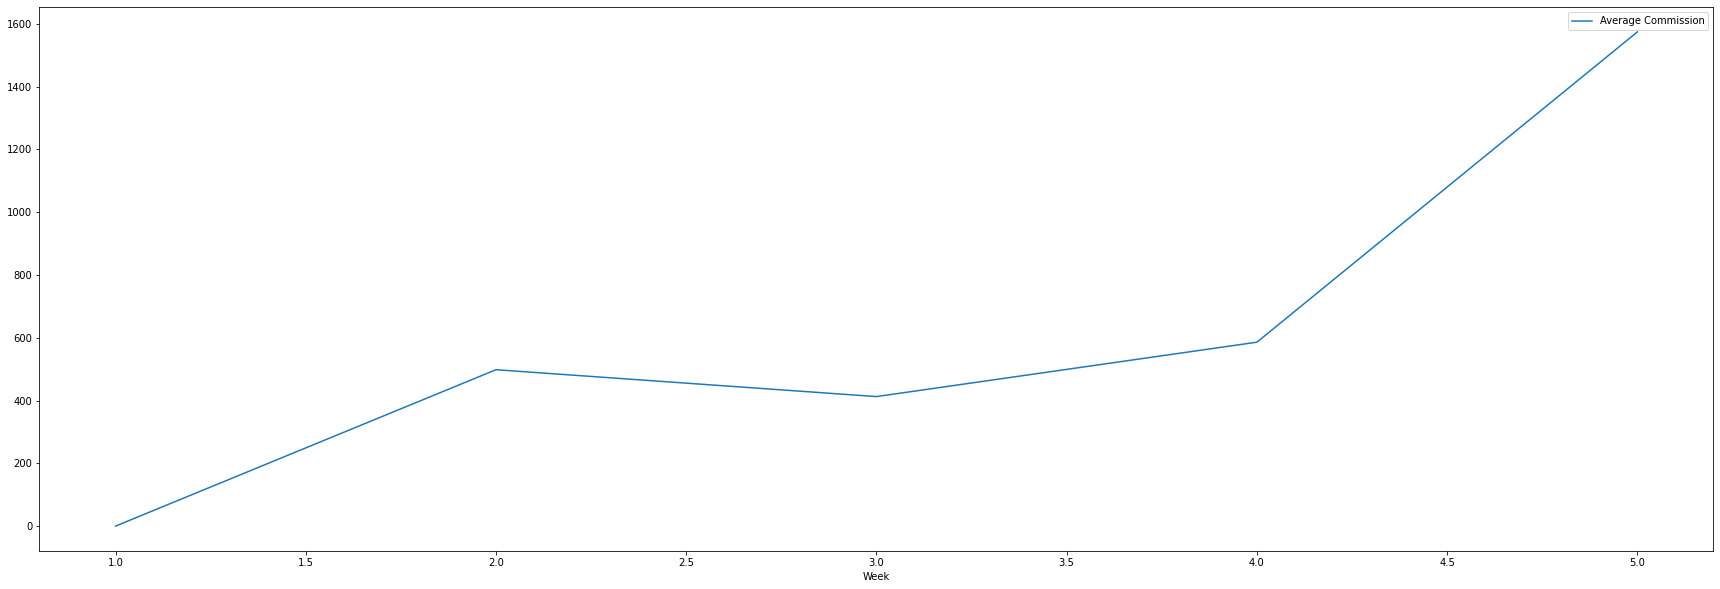

In [20]:
#getting the values for specific months
com_jan = com_mth[com_mth['Month']== 1]
com_jan = com_jan.sort_values(by='Week')
com_jan = com_jan.drop(columns=['Month'])
com_jan

#getting the values for each week
wk1 = com_jan[com_jan['Week']== 1]
wk1

wk2 = com_jan[com_jan['Week']== 2]
wk2

wk3 = com_jan[com_jan['Week']== 3]
wk3 

wk4 = com_jan[com_jan['Week']== 4]
wk4

wk5 = com_jan[com_jan['Week']== 5]
wk5
#comm_graph = commission_monthly.plot.bar(x='Month', y='Commision Earned', figsize=(30,10))


#getting the average for each week, putting it into a line graph to see a trendline
wk2['Commision Earned'].mean()
wk3['Commision Earned'].mean()
wk4['Commision Earned'].mean()
wk5['Commision Earned'].mean()

d = {'Week': [1, 2, 3, 4, 5], 
     'Average Commission': [ 0,
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

janAvgComm = pd.DataFrame(data=d)
janAvgComm
janAvg_graph = janAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [21]:
com_jan

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4630,2,Elder Mariamu Omurayi,Tarpaulins,Tarpaulins,1,200.0,2200
9908,2,Peter Adede,Tarpaulins,Tarpaulins,5,1000.0,12000
4632,2,Phylis Olendo,Tarpaulins,Tarpaulins,2,200.0,4400
3883,2,Lazarus Owade,Crop Protection,Pest And Desease Control,300,150.0,2250
10652,2,Samson Opiyo,Tarpaulins,Tarpaulins,13,1300.0,28600
...,...,...,...,...,...,...,...
7656,5,David Mwikamba,Crop Protection,Pest And Desease Control,1400,440.0,6300
7916,5,David Mwikamba,Crop Protection,Pest And Desease Control,2000,485.0,7250
7941,5,Morris Olaba,Hermetic,Hermetic,20,500.0,4500
5792,5,Ali Otini,Crop Nutrition,Fertilizers,250,250.0,15500


In [22]:
com_jan.min()
com_jan.max()

Week                             2
fscName                  Ali Otini
Category            Crop Nutrition
Type                     Equipment
Quantity                         1
Commision Earned              10.0
Value                          200
dtype: object

Week                                5
fscName             Washington Obiero
Category                   Tarpaulins
Type                       Tarpaulins
Quantity                         9100
Commision Earned              19200.0
Value                          160300
dtype: object

In [23]:
#find the amount of services provided by each FSC
com_jan.groupby('fscName')['Type'].nunique()

fscName
Ali Otini                 1
Amos Magero               1
Angeline Atsieno          3
Beatrice Kanene           1
Cyprian Wanyama           1
David Mwikamba            9
David Onyunde             2
Elder Mariamu Omurayi     2
Enock Okeyo               1
Everlene Ouma             1
Florence Nabwire          2
Fredrick Andera           2
George Mauki              4
Henderica Okwayo          1
Jacinta Adhaya Ochieng    2
Jacob Muriugi             2
Jesca Orodi               1
John Oyolo                1
Joseph Imeli Imo          1
Joseph Marangu            2
Joseph Ngungi             3
Joseph Nyalando           2
Joseph Odwar              2
Josphat Mukembu           3
Josphine Okolondi         1
Judith Akinyi             1
Julia Marungu             2
Lazarus Owade             2
Leanah Mwangi             1
Lucy Kaari                5
Lucy Kigunda              1
Matilda Owira             1
Mercy Kaari               4
Millicent Wanjare         1
Morris Olaba              1
Moses Muthen

In [24]:
ServPJan = com_jan.groupby('fscName')['Type'].nunique().reset_index()
ServPJan

,fscName,Type
0,Ali Otini,1
1,Amos Magero,1
2,Angeline Atsieno,3
3,Beatrice Kanene,1
4,Cyprian Wanyama,1
5,David Mwikamba,9
6,David Onyunde,2
7,Elder Mariamu Omurayi,2
8,Enock Okeyo,1
9,Everlene Ouma,1


In [25]:
#Find the number of services provided in the month for each type
demandJan = com_jan.groupby('Type')['fscName'].nunique().reset_index()
demandJan

,Type,fscName
0,Equipment,1
1,Fertilizers,18
2,Foliar,7
3,Herbicide,6
4,Hermetic,20
5,Livestock Product,2
6,Pest And Desease Control,11
7,Sacks,3
8,Seeds,8
9,Tarpaulins,27


# FEBRUARY <a class="anchor" id="feb"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
8549,1,Suasan Nyeera,Tarpaulins,Tarpaulins,6,600.0,13200
1892,1,Lucy Kaari,Crop Protection,Herbicide,1,60.0,650
11422,1,Samson Sawo,Crop Nutrition,Fertilizers,1000,2000.0,56000
9997,1,Hagai Nido,Crop Nutrition,Fertilizers,500,1000.0,28000
2078,1,Lucy Kaari,Crop Nutrition,Foliar,1,65.0,200
...,...,...,...,...,...,...,...
9998,4,Washington Obiero,Crop Nutrition,Fertilizers,500,1000.0,32000
9838,4,Zachary Mwenda,Hermetic,Hermetic,38,920.0,8360
9687,4,Washington Obiero,Crop Nutrition,Fertilizers,450,900.0,28800
3891,4,Daniel Kogai,Seeds,Seeds,6,150.0,1500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
8549,1,Suasan Nyeera,Tarpaulins,Tarpaulins,6,600.0,13200
1892,1,Lucy Kaari,Crop Protection,Herbicide,1,60.0,650
11422,1,Samson Sawo,Crop Nutrition,Fertilizers,1000,2000.0,56000
9997,1,Hagai Nido,Crop Nutrition,Fertilizers,500,1000.0,28000
2078,1,Lucy Kaari,Crop Nutrition,Foliar,1,65.0,200
9915,1,Rosalid Kathure,Tarpaulins,Tarpaulins,10,1000.0,22000
12433,1,Joseph Marangu,Sacks,Sacks,590,4130.0,11800
2615,1,Judith Oketch,Hermetic,Hermetic,4,100.0,900
2614,1,Josphine Okolondi,Hermetic,Hermetic,4,100.0,900
2234,1,Lucy Kaari,Crop Nutrition,Foliar,1,75.0,250


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4463,2,Lazarus Owade,Crop Nutrition,Fertilizers,80,170.0,4000
7163,2,Regina Muthoni,Tarpaulins,Tarpaulins,4,400.0,8800
11322,2,Shadrack Okuku,Seeds,Seeds,11,1100.0,1100
10600,2,Leanah Mwangi,Hermetic,Hermetic,25,1250.0,6250
3548,2,Lucy Kaari,Crop Protection,Pest And Desease Control,300,120.0,750
...,...,...,...,...,...,...,...
12005,2,Nicholas Owiti,Hermetic,Hermetic,100,3000.0,23000
12319,2,Peter Adede,Hermetic,Hermetic,76,3800.0,19000
10682,2,Richard Mbaria,Seeds,Seeds,600,600.0,24000
11565,2,Joseph Marangu,Sacks,Sacks,300,2100.0,6000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
7166,3,Joseph Ngungi,Crop Protection,Pest And Desease Control,200,400.0,1200
6191,3,John Nyamburi,Crop Protection,Pest And Desease Control,3,300.0,3000
6195,3,John Ouko,Hermetic,Hermetic,12,300.0,2700
6332,3,Robert Opar,Crop Nutrition,Fertilizers,150,300.0,9600
6857,3,Gilbert Ombok,Hermetic,Hermetic,13,325.0,2600
7167,3,Leanah Mwangi,Crop Protection,Pest And Desease Control,200,400.0,2200
6190,3,Jane Karugu,Crop Protection,Pest And Desease Control,3,300.0,1800
602,3,Julia Marungu,Seeds,Seeds,12,300.0,3000
4194,3,Robert Opar,Crop Nutrition,Fertilizers,150,150.0,9600
9927,3,Richard Mbaria,Seeds,Seeds,9,270.0,3510


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
11423,4,Lawrence Mukabane,Crop Nutrition,Fertilizers,1000,2000.0,64000
2464,4,Leanah Mwangi,Sacks,Sacks,12,84.0,360
2584,4,Lucy Kaari,Crop Nutrition,Fertilizers,19,95.0,950
2625,4,Marlone Awillie,Crop Protection,Herbicide,2,100.0,2000
2626,4,Margaret Mungai,Crop Protection,Pest And Desease Control,2,100.0,800
...,...,...,...,...,...,...,...
9998,4,Washington Obiero,Crop Nutrition,Fertilizers,500,1000.0,32000
9838,4,Zachary Mwenda,Hermetic,Hermetic,38,920.0,8360
9687,4,Washington Obiero,Crop Nutrition,Fertilizers,450,900.0,28800
3891,4,Daniel Kogai,Seeds,Seeds,6,150.0,1500


,Week,Average Commission
0,6,661.470588
1,7,1162.796875
2,8,1775.928571
3,9,6060.981982


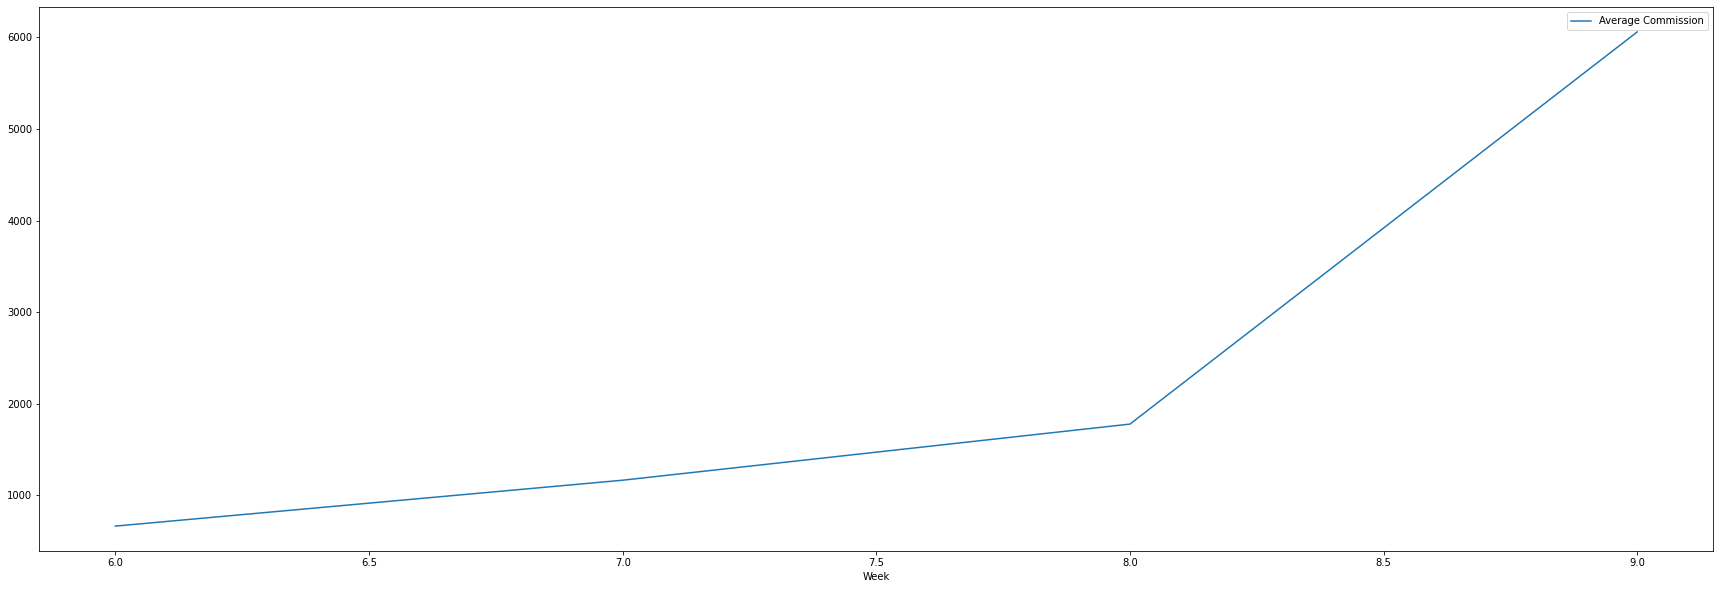

In [26]:
#getting the values for specific months
com_feb = com_mth[com_mth['Month']== 2]
com_feb = com_feb.sort_values(by='Week')
com_feb = com_feb.drop(columns=['Month'])
com_feb

#getting the values for each week
wk1 = com_feb[com_feb['Week']== 1]
wk1

wk2 = com_feb[com_feb['Week']== 2]
wk2

wk3 = com_feb[com_feb['Week']== 3]
wk3 

wk4 = com_feb[com_feb['Week']== 4]
wk4


d = {'Week': [6, 7, 8, 9], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

febAvgComm = pd.DataFrame(data=d)
febAvgComm
febAvg_graph = febAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [27]:
com_feb.min()
com_feb.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         1
Commision Earned               2.0
Value                           90
dtype: object

Week                             4
fscName             Zachary Mwenda
Category                Tarpaulins
Type                    Tarpaulins
Quantity                        96
Commision Earned          262000.0
Value                      1146000
dtype: object

In [28]:
com_feb.groupby('fscName')['Type'].nunique()

fscName
Abraham Nganga       1
Ali Otini            1
Alphanus Ochura      1
Amos Magero          5
Ayub Owiti           1
                    ..
Shadrack Okuku       1
Stella Muthee        1
Suasan Nyeera        1
Washington Obiero    1
Zachary Mwenda       3
Name: Type, Length: 81, dtype: int64

In [29]:
ServPFeb = com_feb.groupby('fscName')['Type'].nunique().reset_index()
ServPFeb

,fscName,Type
0,Abraham Nganga,1
1,Ali Otini,1
2,Alphanus Ochura,1
3,Amos Magero,5
4,Ayub Owiti,1
...,...,...
76,Shadrack Okuku,1
77,Stella Muthee,1
78,Suasan Nyeera,1
79,Washington Obiero,1


In [30]:
#Find the number of services provided in the month for each type
com_feb.groupby('Type')['fscName'].nunique()

Type
Equipment                    1
Fertilizers                 36
Foliar                       5
Herbicide                   10
Hermetic                    26
Livestock Product            1
Pest And Desease Control    15
Sacks                        7
Seedlings                    1
Seeds                       24
Tarpaulins                  22
Name: fscName, dtype: int64

In [31]:
demandFeb = com_feb.groupby('Type')['fscName'].nunique().reset_index()
demandFeb

,Type,fscName
0,Equipment,1
1,Fertilizers,36
2,Foliar,5
3,Herbicide,10
4,Hermetic,26
5,Livestock Product,1
6,Pest And Desease Control,15
7,Sacks,7
8,Seedlings,1
9,Seeds,24


# MARCH <a class="anchor" id="mar"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
354,1,Alice Obare,Seeds,Seeds,6,1.0,1500
2647,1,Lazarus Owade,Hermetic,Hermetic,10,100.0,2300
2637,1,Festus Kinyua,Crop Protection,Pest And Desease Control,100,100.0,350
2648,1,Moses Muthengi,Tarpaulins,Tarpaulins,5,100.0,11000
2649,1,Robert Opar,Sacks,Sacks,40,100.0,1600
...,...,...,...,...,...,...,...
9947,4,Ayub Owiti,Seeds,Seeds,100,1000.0,24000
9949,4,Joseph Amara,Seeds,Seeds,30,1000.0,5000
3823,4,Josephat Okisiang,Seeds,Seeds,28,140.0,7000
3564,4,Lazarus Owade,Seeds,Seeds,12,120.0,3300


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
354,1,Alice Obare,Seeds,Seeds,6,1.0,1500
2647,1,Lazarus Owade,Hermetic,Hermetic,10,100.0,2300
2637,1,Festus Kinyua,Crop Protection,Pest And Desease Control,100,100.0,350
2648,1,Moses Muthengi,Tarpaulins,Tarpaulins,5,100.0,11000
2649,1,Robert Opar,Sacks,Sacks,40,100.0,1600
...,...,...,...,...,...,...,...
1185,1,Festus Kinyua,Crop Protection,Pest And Desease Control,100,50.0,250
1178,1,Lucy Kaari,Crop Protection,Pest And Desease Control,1,50.0,150
11865,1,Joseph Odwar,Hermetic,Hermetic,255,2550.0,58650
11875,1,Jacob Owuor Oketch,Hermetic,Hermetic,103,2575.0,23175


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
7184,2,Ali Otini,Tarpaulins,Tarpaulins,4,400.0,8800
5729,2,Roseline Syama,Seeds,Seeds,42,210.0,9450
7889,2,Rosemary Ochieng,Seeds,Seeds,100,10.0,500
5748,2,Roseline Syama,Seeds,Seeds,44,220.0,10560
5525,2,Matilda Owira,Crop Nutrition,Fertilizers,110,220.0,8250
...,...,...,...,...,...,...,...
12785,2,Julius Oker,Seeds,Seeds,120,600.0,27000
8438,2,Selemiah Ochieng,Crop Nutrition,Fertilizers,50,550.0,2500
10241,2,Rosemary Ochieng,Seeds,Seeds,52,520.0,13000
7958,2,Amos Magero,Crop Protection,Herbicide,10,500.0,10000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
10017,3,Benjamin Wanguba,Crop Nutrition,Fertilizers,500,1000.0,29000
7143,3,Marlone Awillie,Crop Nutrition,Fertilizers,260,390.0,15600
10018,3,Samson Opiyo,Crop Nutrition,Fertilizers,500,1000.0,34000
10019,3,Abraham Nganga,Crop Nutrition,Fertilizers,500,1000.0,29000
4359,3,Boaz Were,Seeds,Seeds,16,160.0,2880
...,...,...,...,...,...,...,...
936,3,Willis Omondi,Seeds,Seeds,96,480.0,23040
718,3,Lucy Kaari,Seeds,Seeds,1,30.0,280
4579,3,Phylis Olendo,Seeds,Seeds,46,230.0,11500
7186,3,Joseph Imeli Imo,Seeds,Seeds,82,400.0,18450


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2083,4,Joseph Marangu,Crop Protection,Herbicide,1,65.0,350
11402,4,Silveria Nkui,Hermetic,Hermetic,40,2000.0,10000
7974,4,Morris Olaba,Hermetic,Hermetic,20,500.0,4500
11243,4,Peter Kiragu,Crop Nutrition,Fertilizers,12,1800.0,35700
2241,4,Joseph Marangu,Seeds,Seeds,1,75.0,150
...,...,...,...,...,...,...,...
9947,4,Ayub Owiti,Seeds,Seeds,100,1000.0,24000
9949,4,Joseph Amara,Seeds,Seeds,30,1000.0,5000
3823,4,Josephat Okisiang,Seeds,Seeds,28,140.0,7000
3564,4,Lazarus Owade,Seeds,Seeds,12,120.0,3300


,Week,Average Commission
0,10,987.097701
1,11,1583.610738
2,12,1432.607143
3,13,1158.582996


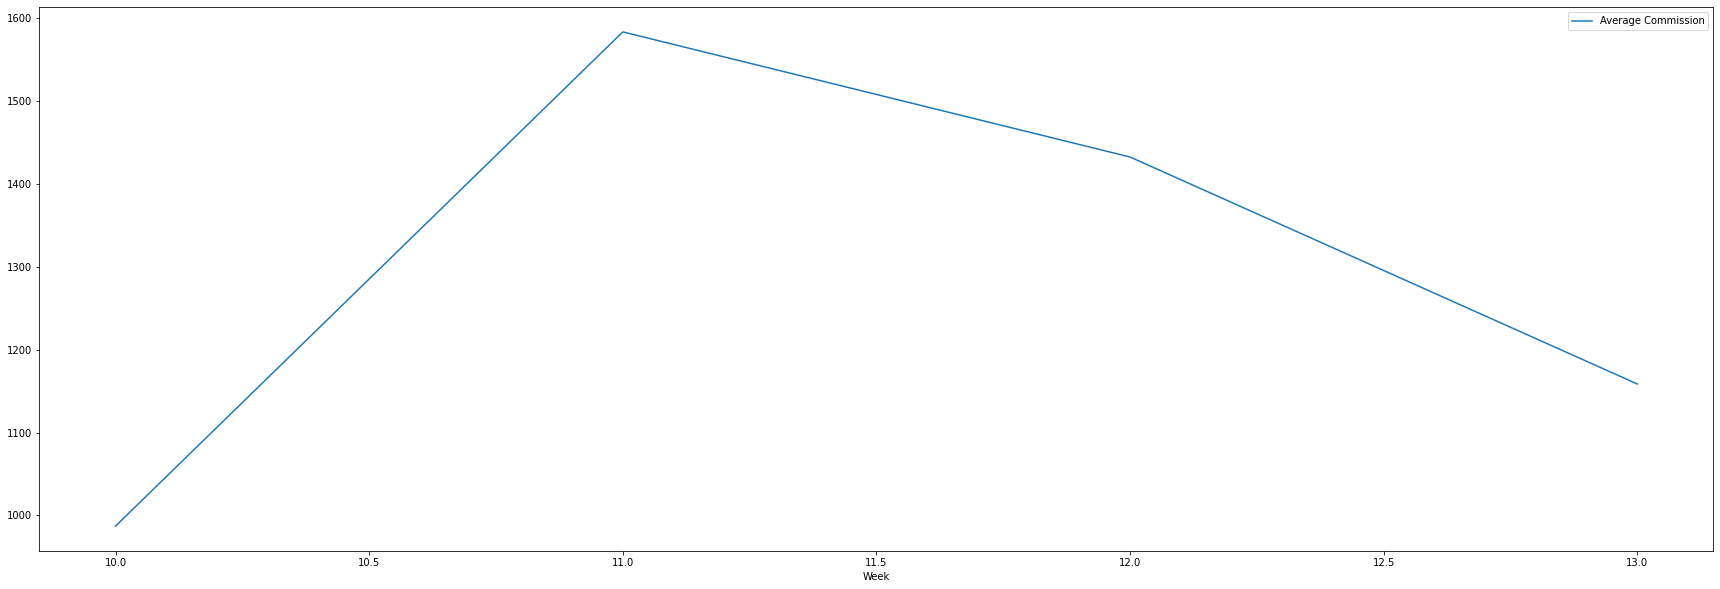

In [32]:
#getting the values for specific months
com_mar = com_mth[com_mth['Month']== 3]
com_mar = com_mar.sort_values(by='Week')
com_mar = com_mar.drop(columns=['Month'])
com_mar

#getting the values for each week
wk1 = com_mar[com_mar['Week']== 1]
wk1

wk2 = com_mar[com_mar['Week']== 2]
wk2

wk3 = com_mar[com_mar['Week']== 3]
wk3 

wk4 = com_mar[com_mar['Week']== 4]
wk4

d = {'Week': [10, 11, 12, 13], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

marAvgComm = pd.DataFrame(data=d)
marAvgComm
marAvg_graph = marAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [33]:
com_mar.min()
com_mar.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         1
Commision Earned               1.0
Value                           50
dtype: object

Week                              4
fscName             Wycliff Ochieng
Category                 Tarpaulins
Type                     Tarpaulins
Quantity                         98
Commision Earned           251900.0
Value                        703900
dtype: object

In [34]:
#Find the number of services provided in the month for each type
com_mar.groupby('Type')['fscName'].nunique()

Type
Equipment                    2
Fertilizers                 89
Foliar                       9
Herbicide                   40
Hermetic                    33
Livestock Product            7
Pest And Desease Control    32
Sacks                        4
Seeds                       95
Tarpaulins                  28
Name: fscName, dtype: int64

In [35]:
ServPMar = com_mar.groupby('fscName')['Type'].nunique().reset_index()
ServPMar

,fscName,Type
0,Abraham Nganga,3
1,Agnes Cherono,3
2,Alex Macharia,4
3,Ali Otini,4
4,Alice Obare,2
...,...,...
135,Washington Obiero,7
136,Watson Wachira,3
137,Wilfred Cheruiyot,1
138,Willis Omondi,1


In [36]:
com_mar.groupby('fscName')['Type'].nunique()

fscName
Abraham Nganga        3
Agnes Cherono         3
Alex Macharia         4
Ali Otini             4
Alice Obare           2
                     ..
Washington Obiero     7
Watson Wachira        3
Wilfred Cheruiyot     1
Willis Omondi         1
Wycliff Ochieng       1
Name: Type, Length: 140, dtype: int64

In [37]:
demandMar = com_mar.groupby('Type')['fscName'].nunique().reset_index()
demandMar

,Type,fscName
0,Equipment,2
1,Fertilizers,89
2,Foliar,9
3,Herbicide,40
4,Hermetic,33
5,Livestock Product,7
6,Pest And Desease Control,32
7,Sacks,4
8,Seeds,95
9,Tarpaulins,28


In [38]:
# FIRST QUARTER AVERAGE  <a class="anchor" id="fqa"></a>

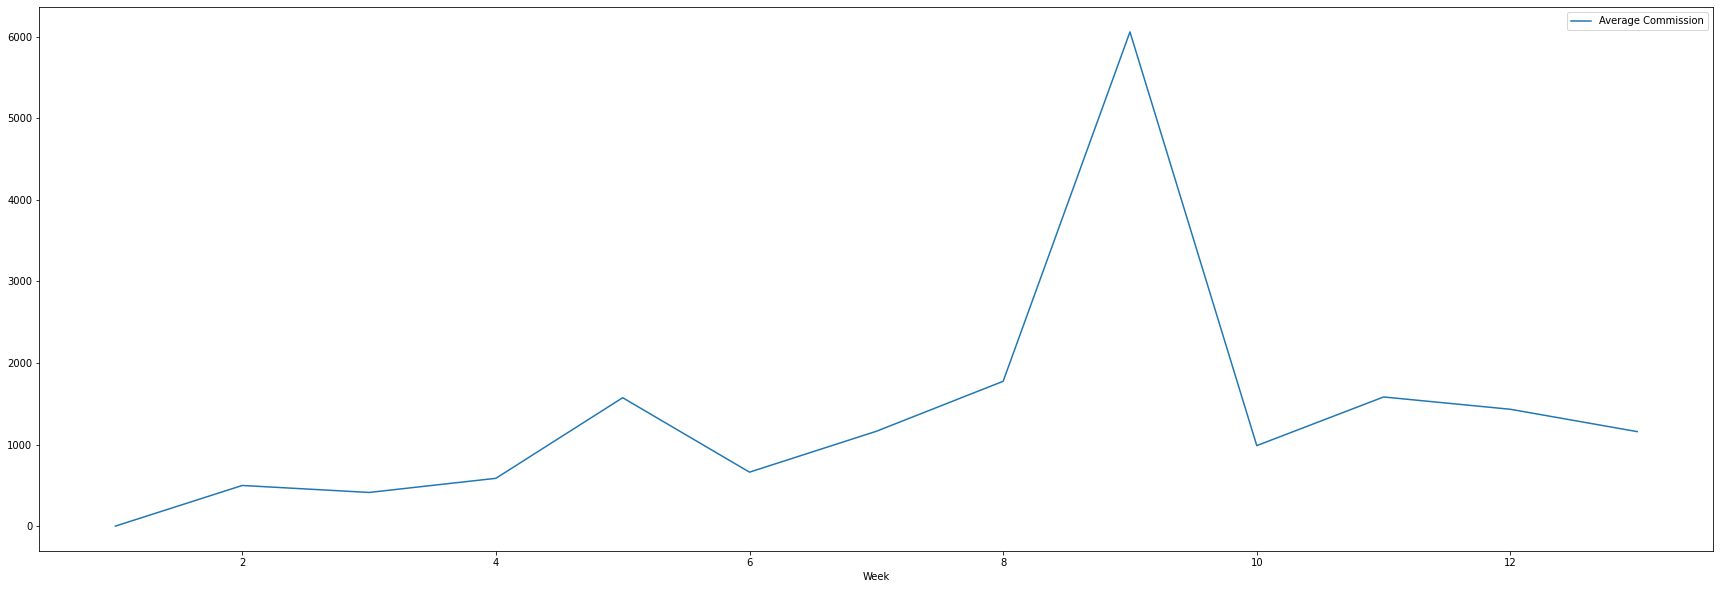

In [39]:
firstQuarter = [janAvgComm, febAvgComm, marAvgComm]

firstQ = pd.concat(firstQuarter)

firstQgraph = firstQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))



In [40]:
#ServPJan
#ServPFeb
#ServPMar

#ServQ1 = pd.merge(ServPJan, ServPFeb, ServPMar, on=['fscName', 'type']).set_index(['fscName']).sum(axis=0)

providedQ1 = ServPJan.merge(ServPFeb,on=['fscName']).merge(ServPMar,on=['fscName'])
providedQ1

,fscName,Type_x,Type_y,Type
0,Ali Otini,1,1,4
1,Amos Magero,1,5,3
2,Beatrice Kanene,1,1,2
3,David Mwikamba,9,6,4
4,Elder Mariamu Omurayi,2,1,5
5,Jacinta Adhaya Ochieng,2,2,2
6,Jacob Muriugi,2,4,4
7,John Oyolo,1,2,2
8,Joseph Imeli Imo,1,1,3
9,Joseph Marangu,2,2,6


# APRIL <a class="anchor" id="apr"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
13188,1,Purity Gatiria,Hermetic,Hermetic,4000,200000.0,1000000
13184,1,Purity Gatiria,Tarpaulins,Tarpaulins,400,160000.0,960000
13172,2,Margaret Mungai,Seeds,Seeds,100,100000.0,300000
13135,1,Morris Thiaine,Crop Nutrition,Fertilizers,7400,31500.0,371700
13131,1,Collins Rotich,Crop Nutrition,Fertilizers,15000,30000.0,1380000
...,...,...,...,...,...,...,...
398,5,Mercy Kaari,Crop Protection,Pest And Desease Control,1600,10.0,4280
397,5,Mercy Kaari,Crop Protection,Pest And Desease Control,50,10.0,250
377,2,Joseph Marangu,Crop Protection,Pest And Desease Control,1,5.0,40
362,5,Leanah Mwangi,Seeds,Seeds,12,2.0,4680


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
13188,1,Purity Gatiria,Hermetic,Hermetic,4000,200000.0,1000000
13184,1,Purity Gatiria,Tarpaulins,Tarpaulins,400,160000.0,960000
13135,1,Morris Thiaine,Crop Nutrition,Fertilizers,7400,31500.0,371700
13131,1,Collins Rotich,Crop Nutrition,Fertilizers,15000,30000.0,1380000
13073,1,Festus Kinyua,Tarpaulins,Tarpaulins,37,18500.0,92500
...,...,...,...,...,...,...,...
520,1,Patricia Oyugi,Crop Protection,Pest And Desease Control,1,20.0,450
518,1,Everlyne Awendo,Seeds,Seeds,4,20.0,1000
50,1,Julia Marungu,Seeds,Seeds,4,20.0,900
519,1,Lucy Kaari,Livestock Product,Livestock Product,1,20.0,30


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
13172,2,Margaret Mungai,Seeds,Seeds,100,100000.0,300000
13065,2,David Mwikamba,Crop Protection,Pest And Desease Control,53,17250.0,110660
13014,2,Joseph Ndirangu,Seeds,Seeds,2500,12500.0,37500
13000,2,Collins Rotich,Seeds,Seeds,1200,12000.0,237000
12951,2,Collins Rotich,Crop Nutrition,Fertilizers,5000,10000.0,250000
...,...,...,...,...,...,...,...
526,2,John Ono,Seeds,Seeds,2,20.0,450
524,2,Dominic Okungu,Seeds,Seeds,4,20.0,1060
523,2,Robert Opar,Crop Protection,Herbicide,4,20.0,3200
396,2,Lucy Kaari,Seeds,Seeds,1,10.0,40


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
12985,3,Jacob Muriugi,Crop Protection,Herbicide,140,11200.0,84000
6498,3,Michael Bii,Seeds,Seeds,5000,10000.0,320000
12931,3,Noah Rono,Seeds,Seeds,2500,5000.0,150000
12590,3,John Koileken,Crop Nutrition,Fertilizers,5000,5000.0,270000
12589,3,Alex Macharia,Crop Nutrition,Fertilizers,2500,5000.0,145000
...,...,...,...,...,...,...,...
1228,3,Josphine Okolondi,Crop Protection,Herbicide,1,50.0,1000
902,3,Joseph Marangu,Crop Protection,Herbicide,1,35.0,200
730,3,Robert Opar,Crop Protection,Herbicide,1,30.0,1820
729,3,Joseph Marangu,Crop Protection,Pest And Desease Control,1,30.0,250


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
13115,4,Purity Gatiria,Tarpaulins,Tarpaulins,61,24400.0,146400
13075,4,Purity Gatiria,Crop Protection,Herbicide,86,19300.0,120400
13050,4,Jacob Muriugi,Crop Protection,Herbicide,190,15200.0,95000
12986,4,Jacob Muriugi,Crop Protection,Herbicide,140,11200.0,84000
12937,4,Jacob Muriugi,Crop Protection,Pest And Desease Control,120,9600.0,58800
...,...,...,...,...,...,...,...
732,4,Francis Oduor,Crop Protection,Pest And Desease Control,1,30.0,350
731,4,Samuel Otana Mawere,Crop Protection,Pest And Desease Control,1,30.0,350
839,4,Josphine Okolondi,Crop Nutrition,Fertilizers,50,30.0,2300
687,4,Eunice Akinyi,Crop Nutrition,Foliar,1,25.0,850


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
12945,5,Doreen Kageni,Tarpaulins,Tarpaulins,33,9900.0,82500
12902,5,Bernard Njagi,Seeds,Seeds,516,8600.0,101760
12666,5,Judith Akinyi,Hermetic,Hermetic,216,5400.0,43200
12523,5,Samson Opiyo,Crop Nutrition,Fertilizers,2300,4600.0,110400
12379,5,Silveria Nkui,Tarpaulins,Tarpaulins,8,4000.0,20000
...,...,...,...,...,...,...,...
529,5,Lucy Kaari,Crop Protection,Pest And Desease Control,1,20.0,90
530,5,Alex Macharia,Crop Protection,Pest And Desease Control,100,20.0,220
398,5,Mercy Kaari,Crop Protection,Pest And Desease Control,1600,10.0,4280
397,5,Mercy Kaari,Crop Protection,Pest And Desease Control,50,10.0,250


,Week,Average Commission
0,14,1812.938326
1,15,1560.483568
2,16,942.563452
3,17,988.690096
4,18,575.445498


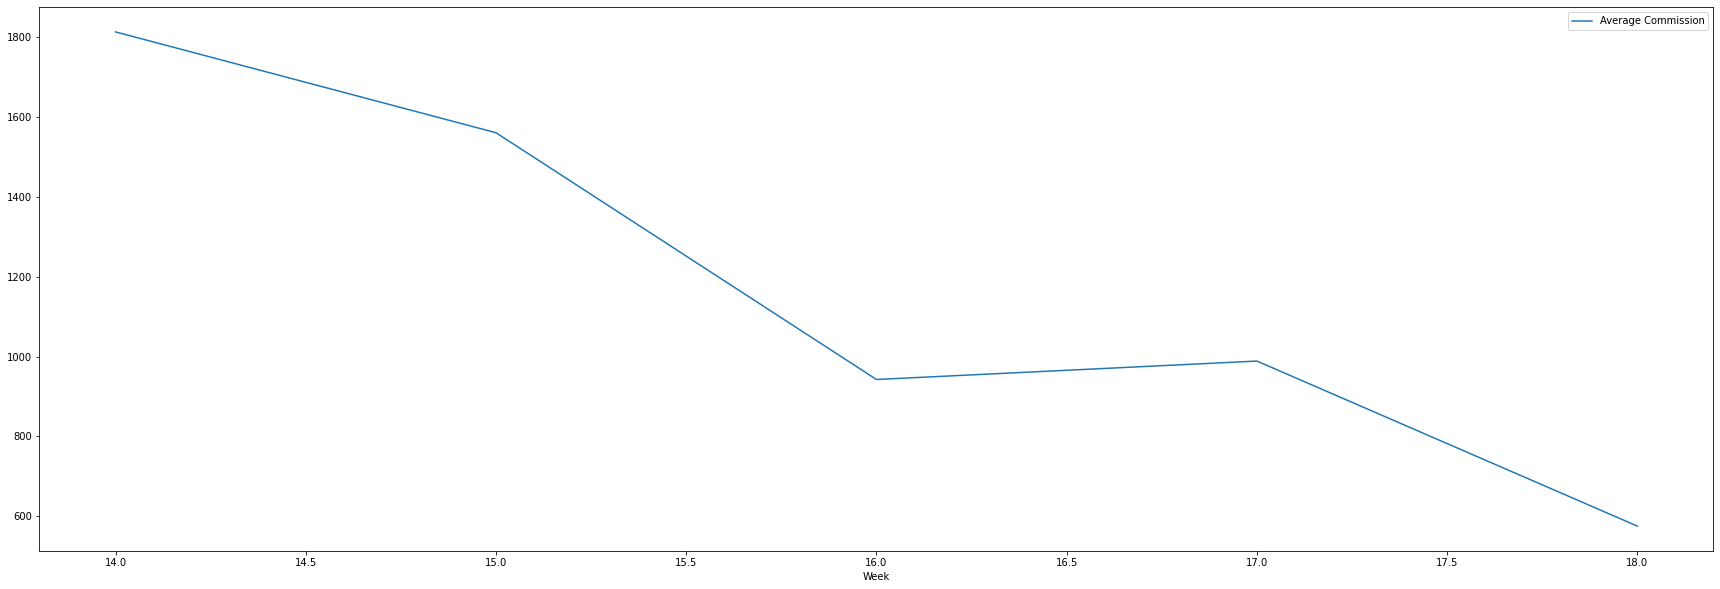

In [41]:
#getting the values for specific months
com_apr = com_mth[com_mth['Month']== 4]
com_apr = com_apr.drop(columns=['Month'])
com_apr

#getting the values for each week
wk1 = com_apr[com_apr['Week']== 1]
wk1

wk2 = com_apr[com_apr['Week']== 2]
wk2

wk3 = com_apr[com_apr['Week']== 3]
wk3 

wk4 = com_apr[com_apr['Week']== 4]
wk4

wk5 = com_apr[com_apr['Week']== 5]
wk5

d = {'Week': [14, 15, 16, 17, 18], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

aprAvgComm = pd.DataFrame(data=d)
aprAvgComm
aprAvg_graph = aprAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [42]:
com_apr.min()
com_apr.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         1
Commision Earned               2.0
Value                           30
dtype: object

Week                           5
fscName             Wycliffe Bet
Category              Tarpaulins
Type                  Tarpaulins
Quantity                      96
Commision Earned        200000.0
Value                    1380000
dtype: object

In [43]:
#Find the number of services provided in the month for each type
com_apr.groupby('Type')['fscName'].nunique()

Type
Equipment                     9
Fertilizers                 120
Foliar                       54
Herbicide                    59
Hermetic                     18
Livestock Product             5
Pest And Desease Control     84
Sacks                         2
Seeds                        99
Tarpaulins                   16
Name: fscName, dtype: int64

In [44]:
ServPApr = com_apr.groupby('fscName')['Type'].nunique().reset_index()
ServPApr

,fscName,Type
0,Abraham Nganga,3
1,Alex Macharia,4
2,Alfred Mwanthi,3
3,Ali Otini,2
4,Alice Atieno Anjinja,4
...,...,...
170,Washington Obiero,3
171,William Obote,4
172,Willis Omondi,1
173,Wycliff Ochieng,1


In [45]:
demandApr = com_apr.groupby('Type')['fscName'].nunique().reset_index()
demandApr

,Type,fscName
0,Equipment,9
1,Fertilizers,120
2,Foliar,54
3,Herbicide,59
4,Hermetic,18
5,Livestock Product,5
6,Pest And Desease Control,84
7,Sacks,2
8,Seeds,99
9,Tarpaulins,16


# MAY <a class="anchor" id="may"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
3971,1,Andrew Gitonga,Crop Protection,Pest And Desease Control,300,150.0,1350
9237,1,Peter Kiragu,Crop Protection,Pest And Desease Control,1600,736.0,3200
5492,1,Peter Kiragu,Crop Nutrition,Foliar,1,215.0,850
3769,1,Joseph Marangu,Crop Protection,Pest And Desease Control,200,130.0,500
9267,1,Francis Opere,Crop Nutrition,Fertilizers,150,750.0,9000
...,...,...,...,...,...,...,...
4974,4,Agnes Cherono,Crop Nutrition,Fertilizers,200,200.0,12000
4890,4,Regina Muthoni,Hermetic,Hermetic,4,200.0,1000
4867,4,Joseph Ngungi,Crop Protection,Pest And Desease Control,200,200.0,400
4015,4,Shadrack Okuku,Crop Protection,Herbicide,3,150.0,5100


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
3971,1,Andrew Gitonga,Crop Protection,Pest And Desease Control,300,150.0,1350
9237,1,Peter Kiragu,Crop Protection,Pest And Desease Control,1600,736.0,3200
5492,1,Peter Kiragu,Crop Nutrition,Foliar,1,215.0,850
3769,1,Joseph Marangu,Crop Protection,Pest And Desease Control,200,130.0,500
9267,1,Francis Opere,Crop Nutrition,Fertilizers,150,750.0,9000
...,...,...,...,...,...,...,...
10831,1,Margaret Mwathwana,Crop Protection,Pest And Desease Control,1800,1440.0,7200
4458,1,Peter Kiragu,Crop Protection,Pest And Desease Control,1,168.0,1400
12782,1,Solomon Muthee,Seeds,Seeds,1267,6335.0,19005
3972,1,Titus Kimathi,Crop Protection,Pest And Desease Control,1,150.0,550


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4382,2,Robert Opar,Crop Protection,Pest And Desease Control,280,160.0,1680
6776,2,Florence Nabwire,Crop Nutrition,Foliar,6,300.0,4800
6634,2,Angeline Atsieno,Crop Nutrition,Fertilizers,200,300.0,10800
6775,2,Ruth Wandera,Crop Nutrition,Foliar,6,300.0,4800
1273,2,Lucy Kaari,Crop Nutrition,Foliar,1,50.0,500
...,...,...,...,...,...,...,...
8021,2,Lavender Achieng,Crop Nutrition,Fertilizers,250,500.0,10000
8403,2,Everlene Ouma,Crop Nutrition,Fertilizers,350,525.0,15400
2152,2,David Okombo,Crop Protection,Pest And Desease Control,100,70.0,400
8436,2,Douglas Kipletan,Crop Protection,Pest And Desease Control,5,545.0,5450


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2855,3,Joseph Marangu,Crop Protection,Herbicide,2,100.0,1000
2840,3,Phillimon Langat,Crop Nutrition,Foliar,2,100.0,2800
2362,3,Alice Atieno Anjinja,Crop Protection,Pest And Desease Control,4,80.0,3800
2359,3,Titus Kimathi,Crop Protection,Pest And Desease Control,100,80.0,300
2287,3,Roseline Syama,Crop Nutrition,Fertilizers,50,75.0,2700
...,...,...,...,...,...,...,...
6335,3,Regina Muthoni,Crop Protection,Pest And Desease Control,3,300.0,2400
5795,3,Julia Marungu,Crop Protection,Herbicide,5,250.0,5000
6334,3,Robert Opar,Crop Protection,Pest And Desease Control,150,300.0,4350
5796,3,Marlone Awillie,Crop Protection,Herbicide,5,250.0,5000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
1953,4,Agnes Cherono,Crop Protection,Pest And Desease Control,300,60.0,1200
1851,4,Lucy Kaari,Seeds,Seeds,1,54.0,200
1955,4,Matilda Owira,Crop Protection,Pest And Desease Control,3,60.0,2400
456,4,Lucy Kaari,Crop Nutrition,Fertilizers,1,15.0,65
1954,4,Samuel Otana Mawere,Crop Nutrition,Foliar,1,60.0,1500
...,...,...,...,...,...,...,...
4974,4,Agnes Cherono,Crop Nutrition,Fertilizers,200,200.0,12000
4890,4,Regina Muthoni,Hermetic,Hermetic,4,200.0,1000
4867,4,Joseph Ngungi,Crop Protection,Pest And Desease Control,200,200.0,400
4015,4,Shadrack Okuku,Crop Protection,Herbicide,3,150.0,5100


,Week,Average Commission
0,19,840.909449
1,20,546.266129
2,21,772.861314
3,22,719.350195


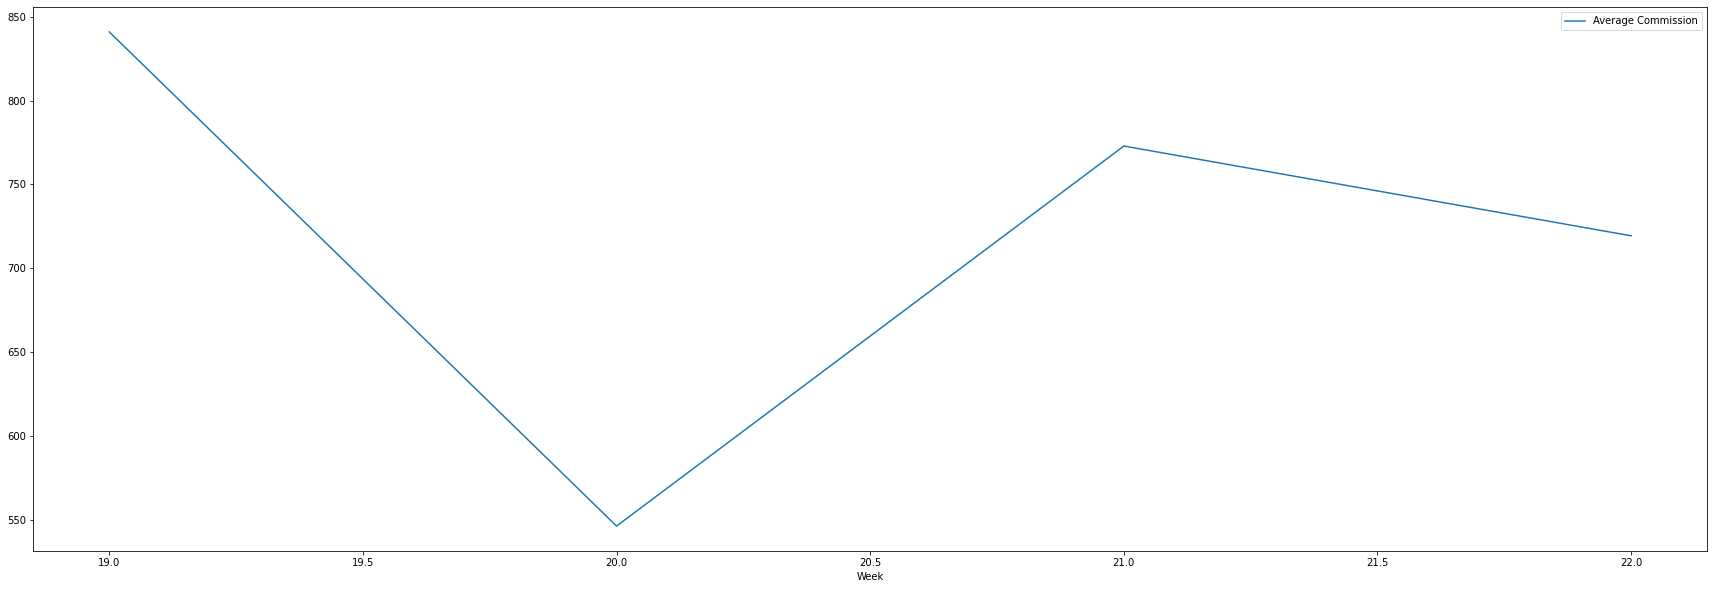

In [46]:
#getting the values for specific months
com_may = com_mth[com_mth['Month']== 5]
com_may = com_may.sort_values(by='Week')
com_may = com_may.drop(columns=['Month'])
com_may

#getting the values for each week
wk1 = com_may[com_may['Week']== 1]
wk1

wk2 = com_may[com_may['Week']== 2]
wk2

wk3 = com_may[com_may['Week']== 3]
wk3 

wk4 = com_may[com_may['Week']== 4]
wk4

d = {'Week': [19, 20, 21, 22], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

mayAvgComm = pd.DataFrame(data=d)
mayAvgComm
mayAvg_graph = mayAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [47]:
com_may.min()
com_may.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         1
Commision Earned               2.0
Value                           30
dtype: object

Week                            4
fscName             Willis Omondi
Category               Tarpaulins
Type                   Tarpaulins
Quantity                      950
Commision Earned          69600.0
Value                      322000
dtype: object

In [48]:
#Find the number of services provided in the month for each type
com_may.groupby('Type')['fscName'].nunique()

Type
Equipment                     5
Fertilizers                 103
Foliar                       72
Herbicide                    39
Hermetic                     14
Livestock Product             4
Pest And Desease Control     78
Sacks                         1
Seeds                        31
Tarpaulins                   10
Name: fscName, dtype: int64

In [49]:
ServPMay = com_may.groupby('fscName')['Type'].nunique().reset_index()
ServPMay

,fscName,Type
0,Abraham Nganga,4
1,Agnes Cherono,3
2,Alex Macharia,3
3,Alfred Mwanthi,3
4,Alice Atieno Anjinja,3
...,...,...
131,Titus Kimathi,5
132,Vincent Airo,3
133,Washington Obiero,3
134,Wiliam Oduol,1


In [50]:
demandMay = com_may.groupby('Type')['fscName'].nunique().reset_index()
demandMay

,Type,fscName
0,Equipment,5
1,Fertilizers,103
2,Foliar,72
3,Herbicide,39
4,Hermetic,14
5,Livestock Product,4
6,Pest And Desease Control,78
7,Sacks,1
8,Seeds,31
9,Tarpaulins,10


# JUNE <a class="anchor" id="jun"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4899,1,Peter Njue,Crop Protection,Pest And Desease Control,400,200.0,1600
4984,1,Earnest Wakhungu,Crop Nutrition,Fertilizers,100,200.0,6000
4903,1,Paul Ochieng Omollo,Crop Protection,Pest And Desease Control,1000,200.0,8000
4902,1,Emilly Akinyi,Crop Protection,Pest And Desease Control,4,200.0,4400
4901,1,Millicent Atieno,Crop Protection,Pest And Desease Control,4,200.0,3800
...,...,...,...,...,...,...,...
8673,4,Samuel Nyapola,Hermetic,Hermetic,24,600.0,5400
4414,4,Kephas Rodo,Seeds,Seeds,20,150.0,4600
10254,4,Kephas Rodo,Hermetic,Hermetic,105,1050.0,23100
4055,4,Jacinta Adhaya Ochieng,Crop Protection,Pest And Desease Control,300,150.0,2850


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
4899,1,Peter Njue,Crop Protection,Pest And Desease Control,400,200.0,1600
4984,1,Earnest Wakhungu,Crop Nutrition,Fertilizers,100,200.0,6000
4903,1,Paul Ochieng Omollo,Crop Protection,Pest And Desease Control,1000,200.0,8000
4902,1,Emilly Akinyi,Crop Protection,Pest And Desease Control,4,200.0,4400
4901,1,Millicent Atieno,Crop Protection,Pest And Desease Control,4,200.0,3800
...,...,...,...,...,...,...,...
13045,1,Rose Wagari,Livestock Product,Livestock Product,90,14310.0,103500
12812,1,Rose Wagari,Crop Protection,Pest And Desease Control,20,6860.0,66600
13145,1,Rose Wagari,Crop Nutrition,Fertilizers,167,41750.0,434200
8048,1,Emilly Akinyi,Tarpaulins,Tarpaulins,5,500.0,11000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
3837,2,Ester Kananu,Crop Protection,Pest And Desease Control,200,140.0,700
4040,2,Joseph Marangu,Seeds,Seeds,30,150.0,300
3997,2,Phylis Olendo,Crop Nutrition,Fertilizers,100,150.0,5400
4326,2,Susan Wanjiru,Crop Nutrition,Foliar,3000,150.0,1950
4041,2,David Onyunde,Crop Protection,Pest And Desease Control,3,150.0,2850
...,...,...,...,...,...,...,...
5540,2,Judith Oketch,Crop Nutrition,Foliar,11,220.0,9350
7850,2,Samuel Opaka,Hermetic,Hermetic,19,475.0,4275
9285,2,Patricia Oyugi,Hermetic,Hermetic,30,750.0,6750
8061,2,Marlone Awillie,Hermetic,Hermetic,50,500.0,11000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2393,3,Regina Muthoni,Crop Protection,Pest And Desease Control,500,80.0,450
2394,3,Jacob Owuor Oketch,Livestock Product,Livestock Product,160,80.0,600
251,3,Phillimon Langat,Seeds,Seeds,2800,2500.0,151200
11814,3,George Onyango,Hermetic,Hermetic,50,2500.0,12500
3641,3,Robert Opar,Seeds,Seeds,250,70.0,500
...,...,...,...,...,...,...,...
9288,3,Elder Mariamu Omurayi,Hermetic,Hermetic,11,750.0,2750
3516,3,Margaret Mwathwana,Crop Protection,Pest And Desease Control,50,110.0,250
10671,3,Amos Magero,Crop Nutrition,Fertilizers,650,1300.0,39000
9286,3,Francis Oduor,Hermetic,Hermetic,30,750.0,6750


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
12386,4,Samson Opiyo,Crop Protection,Pest And Desease Control,40000,4000.0,102000
9458,4,Lucas Onyango,Tarpaulins,Tarpaulins,8,800.0,17600
9459,4,Rose Ndolo,Tarpaulins,Tarpaulins,4,800.0,8800
1389,4,Phillimon Langat,Crop Protection,Herbicide,1,50.0,1000
12485,4,Abraham Nganga,Crop Nutrition,Fertilizers,15,4500.0,45000
...,...,...,...,...,...,...,...
8673,4,Samuel Nyapola,Hermetic,Hermetic,24,600.0,5400
4414,4,Kephas Rodo,Seeds,Seeds,20,150.0,4600
10254,4,Kephas Rodo,Hermetic,Hermetic,105,1050.0,23100
4055,4,Jacinta Adhaya Ochieng,Crop Protection,Pest And Desease Control,300,150.0,2850


,Week,Average Commission
0,23,547.858974
1,24,685.173516
2,25,668.054795
3,26,1607.637209


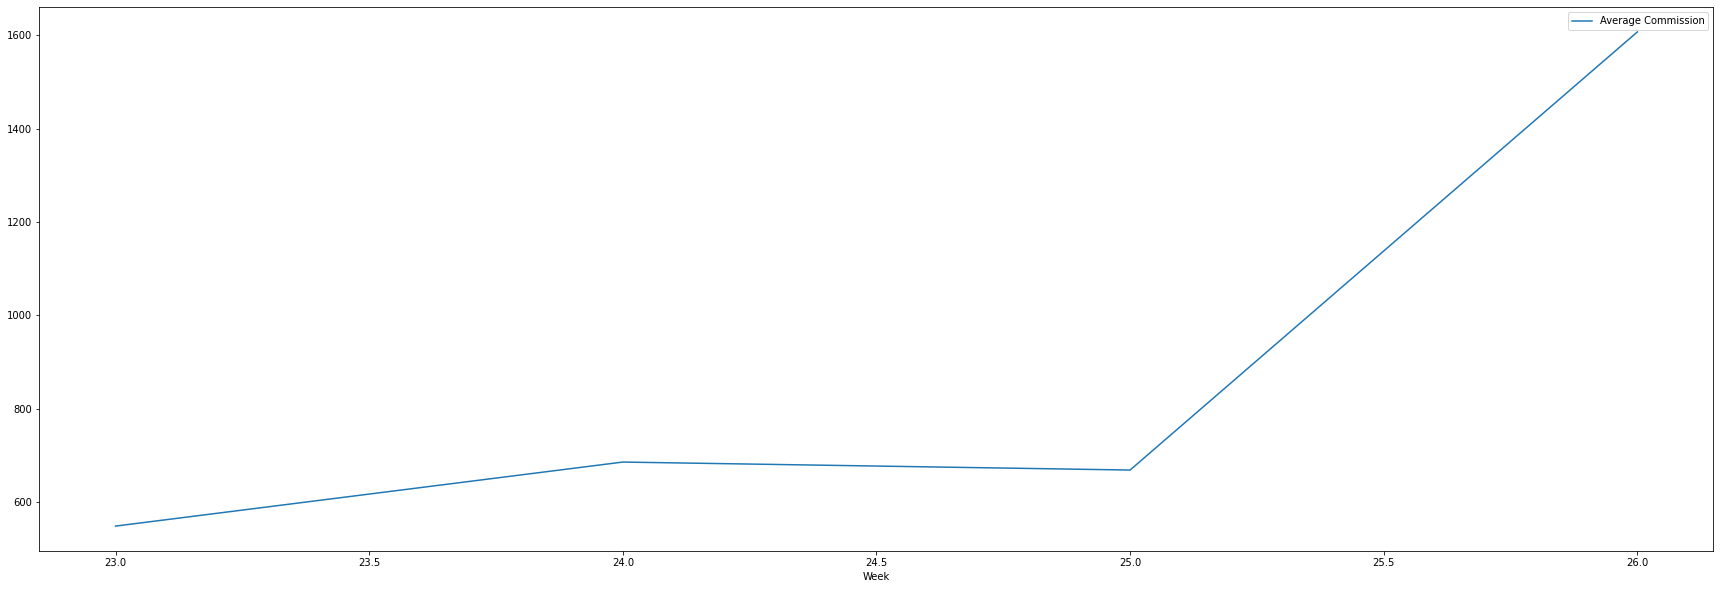

In [51]:
#getting the values for specific months
com_jun = com_mth[com_mth['Month']== 6]
com_jun = com_jun.sort_values(by='Week')
com_jun = com_jun.drop(columns=['Month'])
com_jun

#getting the values for each week
wk1 = com_jun[com_jun['Week']== 1]
wk1

wk2 = com_jun[com_jun['Week']== 2]
wk2

wk3 = com_jun[com_jun['Week']== 3]
wk3 

wk4 = com_jun[com_jun['Week']== 4]
wk4


d = {'Week': [23, 24, 25, 26], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

junAvgComm = pd.DataFrame(data=d)
junAvgComm
junAvg_graph = junAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [52]:
com_jun.min()
com_jun.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         0
Commision Earned               2.0
Value                           30
dtype: object

Week                           4
fscName             Wycliff Ojal
Category              Tarpaulins
Type                  Tarpaulins
Quantity                      98
Commision Earned         50000.0
Value                     675700
dtype: object

In [53]:
#Find the number of services provided in the month for each type
com_jun.groupby('Type')['fscName'].nunique()

Type
Equipment                    4
Fertilizers                 80
Foliar                      57
Herbicide                   22
Hermetic                    49
Livestock Product           10
Other                        7
Pest And Desease Control    67
Sacks                        1
Seeds                       34
Tarpaulins                  56
Name: fscName, dtype: int64

In [54]:
ServPJun = com_may.groupby('fscName')['Type'].nunique().reset_index()
ServPJun

,fscName,Type
0,Abraham Nganga,4
1,Agnes Cherono,3
2,Alex Macharia,3
3,Alfred Mwanthi,3
4,Alice Atieno Anjinja,3
...,...,...
131,Titus Kimathi,5
132,Vincent Airo,3
133,Washington Obiero,3
134,Wiliam Oduol,1


In [55]:
demandJun = com_jun.groupby('Type')['fscName'].nunique().reset_index()
demandJun

,Type,fscName
0,Equipment,4
1,Fertilizers,80
2,Foliar,57
3,Herbicide,22
4,Hermetic,49
5,Livestock Product,10
6,Other,7
7,Pest And Desease Control,67
8,Sacks,1
9,Seeds,34


# SECOND QUARTER AVERAGE<a class="anchor" id="sqa"></a>

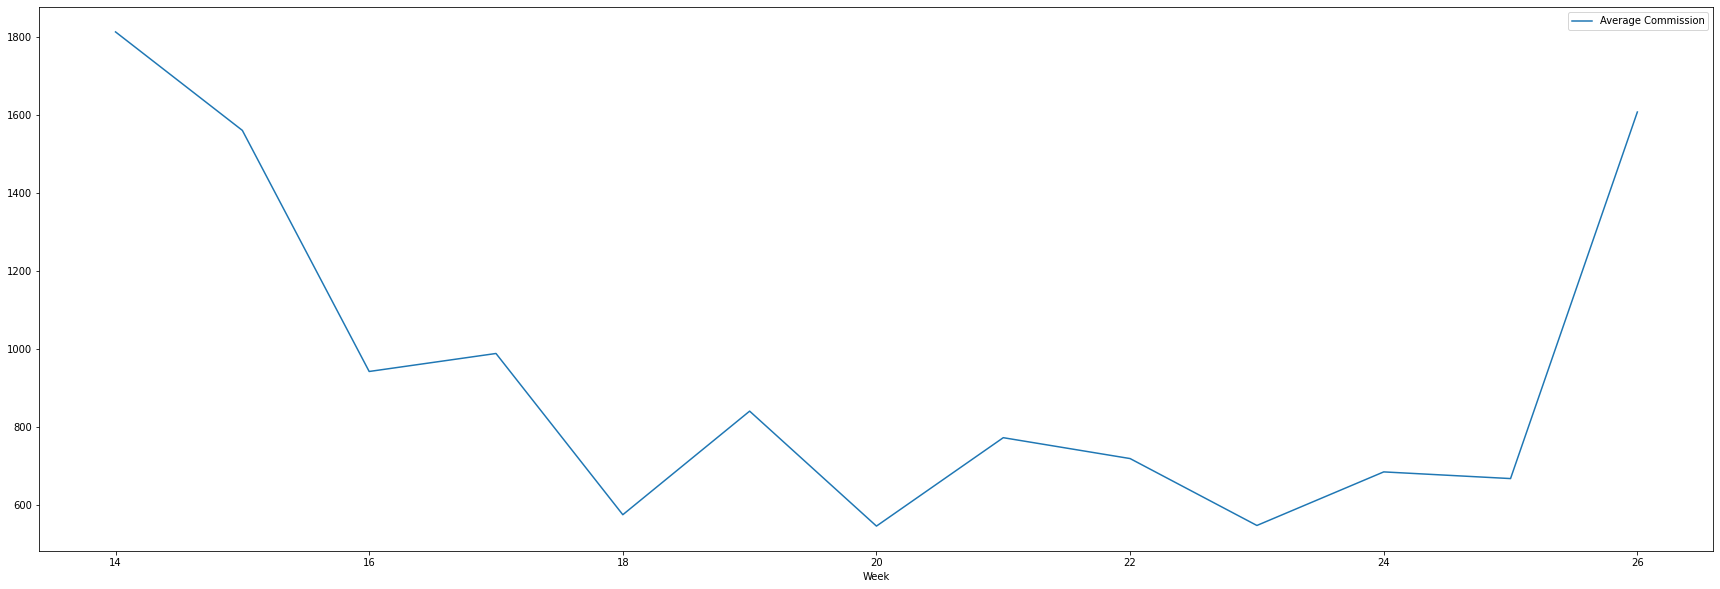

In [56]:
secondQuarter = [aprAvgComm, mayAvgComm, junAvgComm]

secondQ = pd.concat(secondQuarter)

secondQgraph = secondQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [57]:
#ServPJan
#ServPFeb
#ServPMar

#ServQ1 = pd.merge(ServPJan, ServPFeb, ServPMar, on=['fscName', 'type']).set_index(['fscName']).sum(axis=0)

providedQ2 = ServPApr.merge(ServPMay,on=['fscName']).merge(ServPJun,on=['fscName'])
#providedQ2
pd.merge(providedQ1, providedQ2, how="outer", on=["fscName"])
#pd.concat([providedQ1, providedQ2], join='inner')

,fscName,Type_x_x,Type_y_x,Type_x,Type_x_y,Type_y_y,Type_y
0,Ali Otini,1.0,1.0,4.0,NaN,NaN,NaN
1,Amos Magero,1.0,5.0,3.0,4.0,2.0,2.0
2,Beatrice Kanene,1.0,1.0,2.0,NaN,NaN,NaN
3,David Mwikamba,9.0,6.0,4.0,4.0,1.0,1.0
4,Elder Mariamu Omurayi,2.0,1.0,5.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...
111,Stella Muthee,NaN,NaN,NaN,4.0,3.0,3.0
112,Susan Sewe,NaN,NaN,NaN,3.0,3.0,3.0
113,Sylvester Owino,NaN,NaN,NaN,6.0,3.0,3.0
114,Titus Kimathi,NaN,NaN,NaN,4.0,5.0,5.0


# JULY <a class="anchor" id="jul"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
7728,1,Dorothy Karimi,Crop Protection,Pest And Desease Control,450,450.0,1800
7729,1,Kephas Rodo,Tarpaulins,Tarpaulins,1,450.0,1500
11571,1,Richard Mbaria,Crop Nutrition,Fertilizers,1050,2100.0,42000
4407,1,Kephas Rodo,Hermetic,Hermetic,4,160.0,1000
8965,1,Amos Magero,Hermetic,Hermetic,21,630.0,4830
...,...,...,...,...,...,...,...
9130,5,Ibrahim Lutta,Crop Nutrition,Fertilizers,350,700.0,21700
9132,5,Judith Oketch,Tarpaulins,Tarpaulins,7,700.0,15400
9133,5,James Onyango,Tarpaulins,Tarpaulins,7,700.0,15400
9623,5,Everlyne Awendo,Hermetic,Hermetic,34,850.0,7650


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
7728,1,Dorothy Karimi,Crop Protection,Pest And Desease Control,450,450.0,1800
7729,1,Kephas Rodo,Tarpaulins,Tarpaulins,1,450.0,1500
11571,1,Richard Mbaria,Crop Nutrition,Fertilizers,1050,2100.0,42000
4407,1,Kephas Rodo,Hermetic,Hermetic,4,160.0,1000
8965,1,Amos Magero,Hermetic,Hermetic,21,630.0,4830
...,...,...,...,...,...,...,...
3006,1,Lily Cherotich,Crop Protection,Pest And Desease Control,500,100.0,850
1012,1,Francis Opere,Seeds,Seeds,20,40.0,280
3005,1,Douglas Kipletan,Crop Protection,Pest And Desease Control,1,100.0,800
1014,1,Lucy Kaari,Sacks,Sacks,8,40.0,160


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
8686,2,Jennifer Kithure,Crop Protection,Pest And Desease Control,400,600.0,1050
8955,2,James Olum,Hermetic,Hermetic,25,625.0,5625
8685,2,Gacheri Inoti,Crop Protection,Herbicide,5,600.0,4500
2895,2,Lucy Kaari,Crop Nutrition,Fertilizers,25,100.0,1600
3632,2,Gacheri Inoti,Crop Protection,Pest And Desease Control,4,120.0,600
...,...,...,...,...,...,...,...
10917,2,Everline Odhiambo,Tarpaulins,Tarpaulins,5,1500.0,12000
2176,2,Ester Kananu,Crop Protection,Pest And Desease Control,100,70.0,350
10911,2,Judith Oketch,Hermetic,Hermetic,60,1500.0,13500
2177,2,Leanah Mwangi,Crop Protection,Pest And Desease Control,100,70.0,500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
888,3,Joseph Marangu,Seeds,Seeds,50,33.0,150
1440,3,Vincent Koech,Crop Protection,Herbicide,1,50.0,600
912,3,Lucy Kaari,Crop Protection,Pest And Desease Control,50,35.0,170
779,3,Dorothy Karimi,Crop Protection,Pest And Desease Control,300,30.0,75
1874,3,Joseph Marangu,Crop Protection,Pest And Desease Control,20,55.0,150
...,...,...,...,...,...,...,...
12913,3,John Nyamburi,Seeds,Seeds,2000,9000.0,180000
6430,3,Everline Odhiambo,Hermetic,Hermetic,10,300.0,2300
12885,3,George Onyango,Tarpaulins,Tarpaulins,27,8100.0,67500
6428,3,Rhoda Oduma,Tarpaulins,Tarpaulins,1,300.0,2400


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
12051,4,Phylis Olendo,Tarpaulins,Tarpaulins,10,3000.0,24000
9238,4,Lucy Kaari,Crop Protection,Pest And Desease Control,400,736.0,3400
2538,4,David Njuguna,Crop Protection,Pest And Desease Control,1350,90.0,1260
2405,4,Lucy Kaari,Crop Nutrition,Foliar,100,80.0,200
2537,4,Lucy Kaari,Crop Protection,Pest And Desease Control,100,90.0,400
...,...,...,...,...,...,...,...
3293,4,Ibrahim Lutta,Crop Nutrition,Fertilizers,50,100.0,2700
3294,4,Kephas Rodo,Crop Nutrition,Fertilizers,100,100.0,5500
571,4,Kephas Rodo,Livestock Product,Livestock Product,500,20.0,600
12393,4,Jacinta Adhaya Ochieng,Tarpaulins,Tarpaulins,20,4000.0,44000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
11823,5,Abraham Nganga,Crop Protection,Pest And Desease Control,5000,2500.0,22000
12867,5,George Onyango,Hermetic,Hermetic,157,7850.0,39250
11824,5,Millicent Wanjare,Hermetic,Hermetic,50,2500.0,12500
12741,5,Rosemary Ochieng,Tarpaulins,Tarpaulins,20,6000.0,52000
12873,5,Mary Sianoi,Crop Protection,Pest And Desease Control,20,8000.0,32000
...,...,...,...,...,...,...,...
9130,5,Ibrahim Lutta,Crop Nutrition,Fertilizers,350,700.0,21700
9132,5,Judith Oketch,Tarpaulins,Tarpaulins,7,700.0,15400
9133,5,James Onyango,Tarpaulins,Tarpaulins,7,700.0,15400
9623,5,Everlyne Awendo,Hermetic,Hermetic,34,850.0,7650


,Week,Average Commission
0,27,1306.869416
1,28,1198.259928
2,29,1824.272358
3,30,3318.835556
4,31,1376.816794


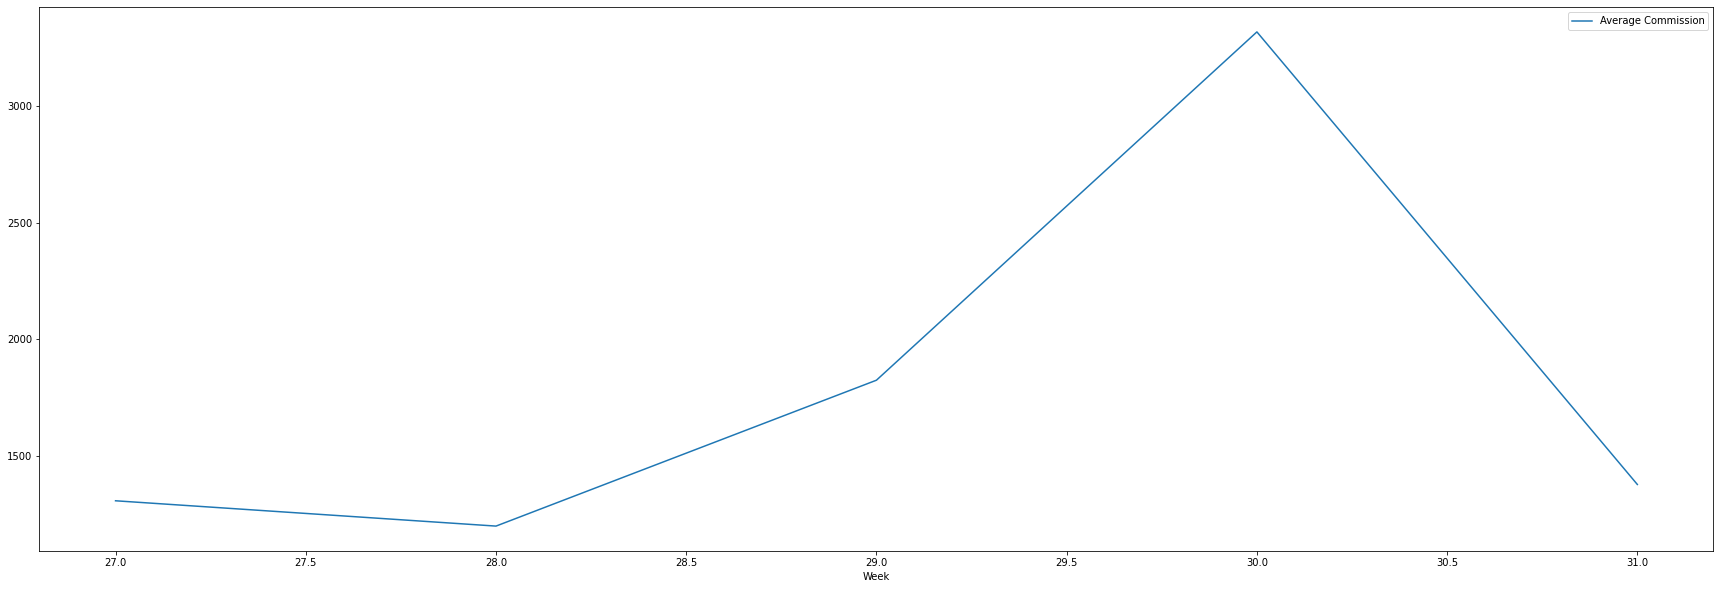

In [58]:
#getting the values for specific months
com_jul = com_mth[com_mth['Month']== 7]
com_jul = com_jul.sort_values(by='Week')
com_jul = com_jul.drop(columns=['Month'])
com_jul

#getting the values for each week
wk1 = com_jul[com_jul['Week']== 1]
wk1

wk2 = com_jul[com_jul['Week']== 2]
wk2

wk3 = com_jul[com_jul['Week']== 3]
wk3 

wk4 = com_jul[com_jul['Week']== 4]
wk4

wk5 = com_jul[com_jul['Week']== 5]
wk5

d = {'Week': [27, 28, 29, 30, 31], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

julAvgComm = pd.DataFrame(data=d)

julAvgComm['Average Commission'] = julAvgComm['Average Commission'].fillna(0)
julAvgComm
julAvg_graph = julAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [59]:
com_jul.min()
com_jul.max()

Week                             1
fscName                Abdi Opwaka
Category            Crop Nutrition
Type                     Equipment
Quantity                         0
Commision Earned               5.0
Value                           30
dtype: object

Week                            5
fscName             Willis Omondi
Category               Tarpaulins
Type                   Tarpaulins
Quantity                     9750
Commision Earned         280000.0
Value                      900000
dtype: object

In [60]:
#Find the number of services provided in the month for each type
com_jul.groupby('Type')['fscName'].nunique()

Type
Equipment                    3
Fertilizers                 69
Foliar                      34
Herbicide                   21
Hermetic                    96
Livestock Product           16
Other                        5
Pest And Desease Control    45
Sacks                       17
Seeds                       36
Tarpaulins                  93
Name: fscName, dtype: int64

# AUGUST  <a class="anchor" id="aug"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
8729,1,Roselyne Agutu,Hermetic,Hermetic,20,600.0,4600
7336,1,Judith Akinyi,Tarpaulins,Tarpaulins,1,400.0,2500
11585,1,Julia Marungu,Tarpaulins,Tarpaulins,7,2100.0,16800
11586,1,Phylis Olendo,Hermetic,Hermetic,70,2100.0,16100
11587,1,Jesca Orodi,Tarpaulins,Tarpaulins,7,2100.0,16800
...,...,...,...,...,...,...,...
8760,4,Mary Sianoi,Crop Protection,Pest And Desease Control,10,600.0,2000
8761,4,Julia Marungu,Crop Protection,Herbicide,6,600.0,6600
5077,4,Bernard Oweke,Crop Protection,Pest And Desease Control,2000,200.0,2000
11103,4,James Onyango,Crop Nutrition,Fertilizers,400,1600.0,22400


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
8729,1,Roselyne Agutu,Hermetic,Hermetic,20,600.0,4600
7336,1,Judith Akinyi,Tarpaulins,Tarpaulins,1,400.0,2500
11585,1,Julia Marungu,Tarpaulins,Tarpaulins,7,2100.0,16800
11586,1,Phylis Olendo,Hermetic,Hermetic,70,2100.0,16100
11587,1,Jesca Orodi,Tarpaulins,Tarpaulins,7,2100.0,16800
...,...,...,...,...,...,...,...
12204,1,Florence Nabwire,Tarpaulins,Tarpaulins,11,3300.0,26400
12257,1,Lazarus Owade,Hermetic,Hermetic,70,3500.0,17500
2702,1,Rose Ndolo,Seeds,Seeds,10,200.0,2500
12069,1,Matilda Owira,Sacks,Sacks,150,3000.0,7500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
1495,2,Douglas Kipletan,Crop Nutrition,Foliar,500,50.0,750
1496,2,Lucy Kaari,Crop Protection,Pest And Desease Control,50,50.0,550
9466,2,Patricia Oyugi,Crop Nutrition,Fertilizers,400,800.0,27200
9473,2,Florence Nabwire,Crop Nutrition,Foliar,8,800.0,12000
1498,2,Julia Marungu,Crop Nutrition,Fertilizers,25,50.0,1400
...,...,...,...,...,...,...,...
13078,2,Roselyne Agutu,Tarpaulins,Tarpaulins,65,19500.0,156000
13171,2,Joseph Ndirangu,Seeds,Seeds,10000,94000.0,700000
13056,2,Jacob Muriugi,Hermetic,Hermetic,323,16150.0,80750
10620,2,Caren Okoth,Hermetic,Hermetic,50,1250.0,11250


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
5053,3,Millicent Atieno,Crop Protection,Pest And Desease Control,2,200.0,2800
11403,3,Julius Oker,Seeds,Seeds,24,240.0,6360
11951,3,Jonathan Otieno,Seeds,Seeds,138,2760.0,13800
11924,3,Robert Nyanjwa,Crop Nutrition,Fertilizers,2700,2700.0,156600
11925,3,Robert Nyanjwa,Crop Nutrition,Fertilizers,2700,2700.0,156600
...,...,...,...,...,...,...,...
10623,3,Francis Babu,Hermetic,Hermetic,25,1250.0,6250
8153,3,Joseph Ebu,Crop Protection,Herbicide,5,500.0,5500
8152,3,Rose Ndolo,Crop Protection,Pest And Desease Control,1000,500.0,8500
8149,3,Julia Marungu,Crop Nutrition,Fertilizers,250,500.0,14000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
3095,4,Ben Cheboi,Crop Protection,Pest And Desease Control,500,100.0,1700
9539,4,Robert Opar,Crop Nutrition,Fertilizers,200,800.0,7000
9485,4,Lawrence Mukabane,Tarpaulins,Tarpaulins,2,800.0,5000
10229,4,Pilly Adhiambo,Seeds,Seeds,80,800.0,20000
10083,4,Pilly Adhiambo,Seeds,Seeds,80,800.0,20000
...,...,...,...,...,...,...,...
8759,4,Peter Wambi,Crop Protection,Herbicide,6,600.0,6600
8760,4,Mary Sianoi,Crop Protection,Pest And Desease Control,10,600.0,2000
8761,4,Julia Marungu,Crop Protection,Herbicide,6,600.0,6600
5077,4,Bernard Oweke,Crop Protection,Pest And Desease Control,2000,200.0,2000


,Week,Average Commission
0,32,2148.917981
1,33,5595.240602
2,34,2343.192641
3,35,1155.111702


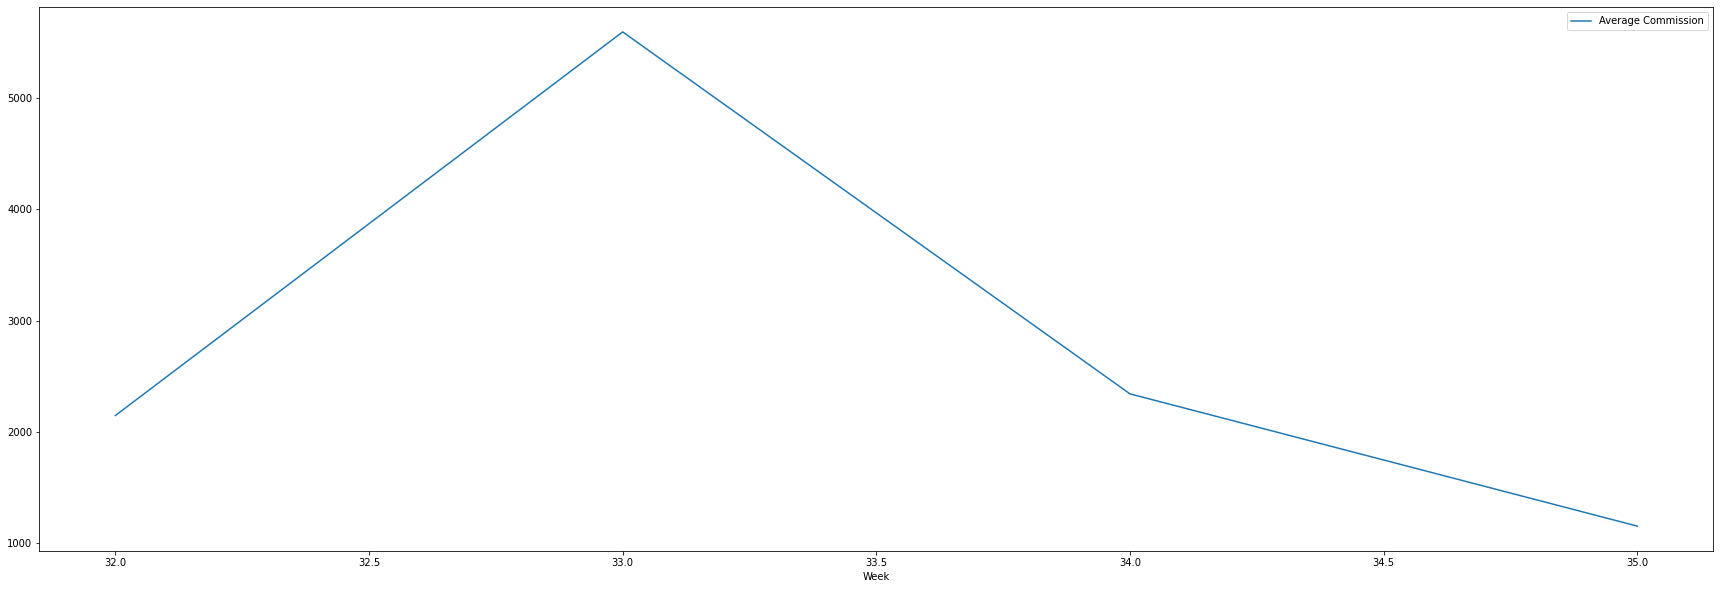

In [61]:
#getting the values for specific months
com_aug = com_mth[com_mth['Month']== 8]
com_aug = com_aug.sort_values(by='Week')
com_aug = com_aug.drop(columns=['Month'])
com_aug

#getting the values for each week
wk1 = com_aug[com_aug['Week']== 1]
wk1

wk2 = com_aug[com_aug['Week']== 2]
wk2

wk3 = com_aug[com_aug['Week']== 3]
wk3 

wk4 = com_aug[com_aug['Week']== 4]
wk4


d = {'Week': [32, 33, 34, 35], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

augAvgComm = pd.DataFrame(data=d)
augAvgComm['Average Commission'] = augAvgComm['Average Commission'].fillna(0)
augAvgComm
augAvg_graph = augAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [62]:
com_aug.min()
com_aug.max()

Week                             1
fscName                Abdi Opwaka
Category            Crop Nutrition
Type                     Equipment
Quantity                         0
Commision Earned               2.0
Value                           30
dtype: object

Week                           5
fscName             Wycliff Ojal
Category              Tarpaulins
Type                  Tarpaulins
Quantity                      98
Commision Earned        630000.0
Value                    1557500
dtype: object

In [63]:
#Find the number of services provided in the month for each type
com_aug.groupby('Type')['fscName'].nunique()

Type
Equipment                     5
Fertilizers                 104
Foliar                       22
Herbicide                    32
Hermetic                    107
Livestock Product             6
Other                         1
Pest And Desease Control     47
Sacks                        21
Seeds                       104
Tarpaulins                   84
Name: fscName, dtype: int64

# SEPTEMBER <a class="anchor" id="sep"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
361,1,Elizabeth Aoko Owiti,Crop Nutrition,Fertilizers,75,2.0,3400
10518,1,Joseph Amara,Seeds,Seeds,84,1200.0,24000
10517,1,Margaret Mungai,Seeds,Seeds,100,1200.0,7000
4418,1,David Okombo,Seeds,Seeds,16,160.0,4000
10449,1,Julius Oker,Crop Nutrition,Fertilizers,200,1200.0,12000
...,...,...,...,...,...,...,...
5177,5,Millicent Atieno,Seeds,Seeds,4,100.0,1040
2900,5,Stella Muthee,Crop Nutrition,Fertilizers,20,100.0,1400
8842,5,Milka Akinyi,Tarpaulins,Tarpaulins,2,600.0,5000
8840,5,Susan Sewe,Tarpaulins,Tarpaulins,3,600.0,6900


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
361,1,Elizabeth Aoko Owiti,Crop Nutrition,Fertilizers,75,2.0,3400
10518,1,Joseph Amara,Seeds,Seeds,84,1200.0,24000
10517,1,Margaret Mungai,Seeds,Seeds,100,1200.0,7000
4418,1,David Okombo,Seeds,Seeds,16,160.0,4000
10449,1,Julius Oker,Crop Nutrition,Fertilizers,200,1200.0,12000
...,...,...,...,...,...,...,...
12098,1,Millicent Wanjare,Tarpaulins,Tarpaulins,10,3000.0,25000
11933,1,Joseph Odwar,Tarpaulins,Tarpaulins,9,2700.0,22500
11967,1,Ibrahim Lutta,Tarpaulins,Tarpaulins,7,2800.0,17500
11904,1,Benson Kesier,Crop Protection,Pest And Desease Control,12,2640.0,16800


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
10109,2,Samuel Kuria,Crop Protection,Pest And Desease Control,6000,1000.0,12000
5887,2,Hagai Nido,Seeds,Seeds,10,250.0,2750
9628,2,Lucas Onyango,Seeds,Seeds,34,850.0,8500
11763,2,Purity Kiende,Crop Nutrition,Foliar,24,2400.0,12000
11616,2,Lucas Onyango,Crop Nutrition,Fertilizers,1075,2150.0,64750
...,...,...,...,...,...,...,...
9964,2,Rose Ndolo,Crop Nutrition,Fertilizers,250,1000.0,12500
5112,2,Luke Chebet,Crop Protection,Pest And Desease Control,2,200.0,4000
10263,2,Samuel Nyapola,Crop Protection,Pest And Desease Control,7,1050.0,8750
11599,2,Kephers Ogola,Crop Protection,Herbicide,14,2100.0,14000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
7001,3,James Onyango,Crop Nutrition,Fertilizers,175,350.0,9200
6561,3,Lucas Onyango,Crop Nutrition,Fertilizers,150,300.0,9000
7409,3,James Makori,Seeds,Seeds,40,400.0,10000
6672,3,Alice Atieno Anjinja,Crop Nutrition,Fertilizers,150,300.0,7800
6991,3,Alice Obare,Crop Nutrition,Fertilizers,350,350.0,18900
...,...,...,...,...,...,...,...
10128,3,James Odondi,Seeds,Seeds,96,1000.0,52800
8806,3,Roseline Syama,Crop Nutrition,Fertilizers,6,600.0,10800
8807,3,Peter Njau,Seeds,Seeds,630,600.0,23600
3296,3,John Nyamburi,Crop Nutrition,Fertilizers,50,100.0,2700


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
3165,4,Douglas Kipletan,Crop Protection,Pest And Desease Control,1,100.0,1000
5154,4,Martin Onyango,Crop Protection,Pest And Desease Control,2,200.0,2800
4745,4,Rose Ndolo,Crop Nutrition,Fertilizers,50,200.0,2300
5160,4,David Okombo,Crop Protection,Pest And Desease Control,280,200.0,1200
823,4,Lazarus Owade,Crop Nutrition,Fertilizers,0,30.0,300
...,...,...,...,...,...,...,...
7147,4,Dominic Okungu,Seeds,Seeds,26,390.0,6500
13087,4,Noah Rono,Seeds,Seeds,5000,20000.0,350000
12447,4,Gerald Rutto,Crop Nutrition,Fertilizers,1400,4200.0,81200
7435,4,Joseph Amara,Crop Protection,Herbicide,2,400.0,2000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
11648,5,Mike Tesot,Seeds,Seeds,5000,20000.0,35000
1849,5,Lucy Kaari,Crop Protection,Pest And Desease Control,200,52.0,180
10521,5,Peter Kiragu,Crop Nutrition,Fertilizers,200,1200.0,12000
2214,5,Douglas Kipletan,Livestock Product,Livestock Product,2,70.0,950
430,5,Milkah Muthoni,Crop Protection,Pest And Desease Control,35,10.0,200
...,...,...,...,...,...,...,...
5177,5,Millicent Atieno,Seeds,Seeds,4,100.0,1040
2900,5,Stella Muthee,Crop Nutrition,Fertilizers,20,100.0,1400
8842,5,Milka Akinyi,Tarpaulins,Tarpaulins,2,600.0,5000
8840,5,Susan Sewe,Tarpaulins,Tarpaulins,3,600.0,6900


,Week,Average Commission
0,36,2231.038961
1,37,1965.374677
2,38,1647.400862
3,39,1714.269504
4,40,907.317380


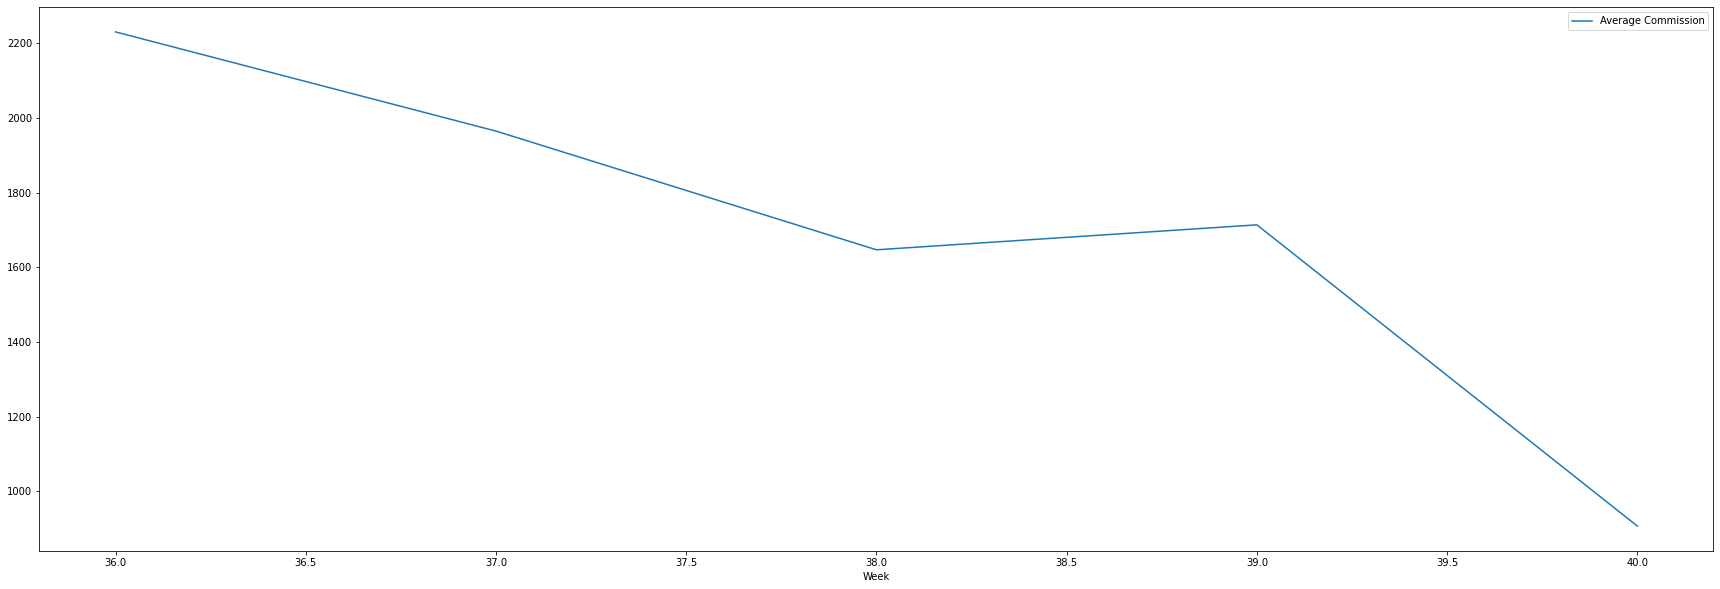

In [64]:
#getting the values for specific months
com_sep = com_mth[com_mth['Month']== 9]
com_sep = com_sep.sort_values(by='Week')
com_sep = com_sep.drop(columns=['Month'])
com_sep

#getting the values for each week
wk1 = com_sep[com_sep['Week']== 1]
wk1

wk2 = com_sep[com_sep['Week']== 2]
wk2

wk3 = com_sep[com_sep['Week']== 3]
wk3 

wk4 = com_sep[com_sep['Week']== 4]
wk4

wk5 = com_sep[com_sep['Week']== 5]
wk5

d = {'Week': [36, 37, 38, 39, 40], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

sepAvgComm = pd.DataFrame(data=d)
sepAvgComm
sepAvg_graph = sepAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [65]:
com_sep.min()
com_sep.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         0
Commision Earned               2.0
Value                            8
dtype: object

Week                           5
fscName             Wycliff Ojal
Category              Tarpaulins
Type                  Tarpaulins
Quantity                      98
Commision Earned        175000.0
Value                    1050000
dtype: object

In [66]:
#Find the number of services provided in the month for each type
com_sep.groupby('Type')['fscName'].nunique()

Type
Equipment                     7
Fertilizers                 144
Foliar                       73
Herbicide                    46
Hermetic                     72
Livestock Product            15
Pest And Desease Control     85
Sacks                         6
Seeds                       130
Tarpaulins                   55
Name: fscName, dtype: int64

# THIRD QUARTER AVERAGE<a class="anchor" id="tqa"></a>

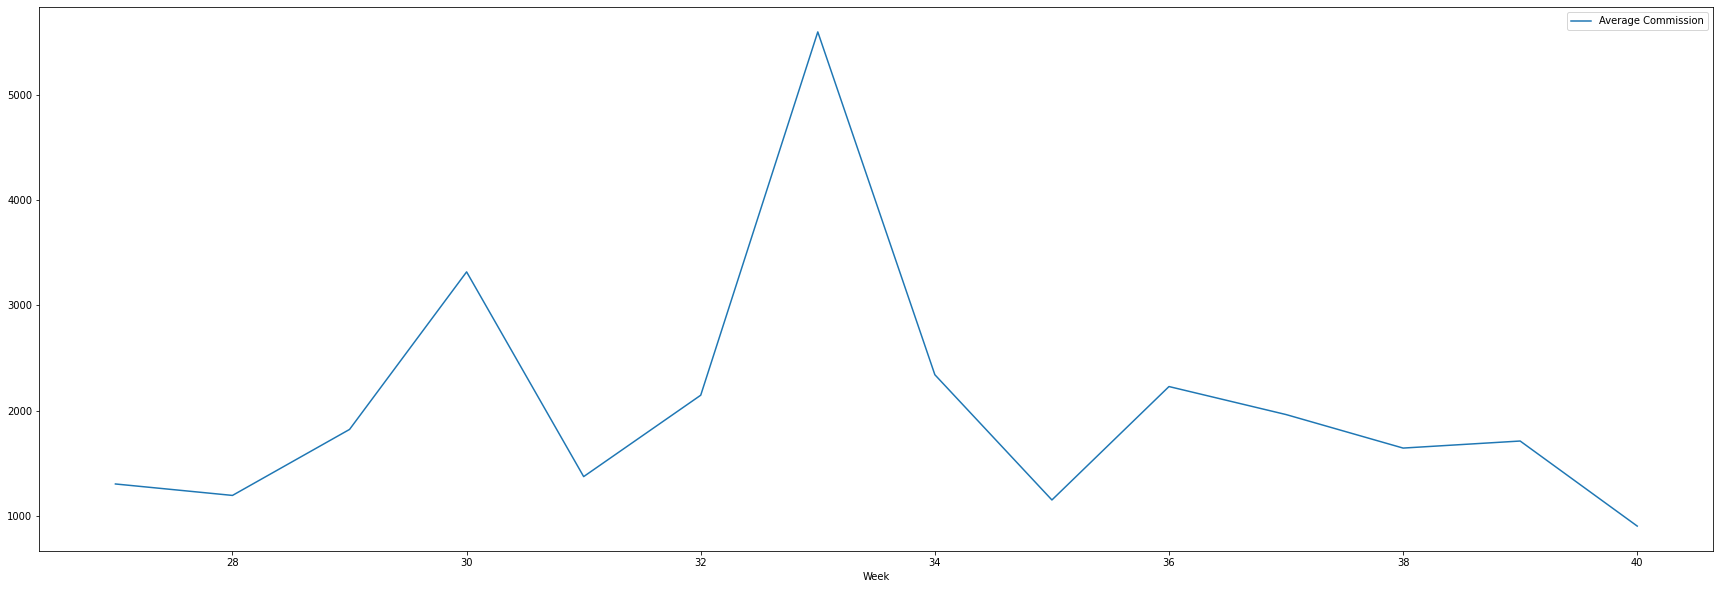

In [67]:
thirdQuarter = [julAvgComm, augAvgComm, sepAvgComm]

thirdQ = pd.concat(thirdQuarter)

thirdQgraph = thirdQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# OCTOBER <a class="anchor" id="oct"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
9925,1,Salome Mwangi,Seeds,Seeds,17500,350000.0,875000
6848,1,Cyprian Wanyama,Crop Nutrition,Fertilizers,160,320.0,9600
10239,1,Suasan Nyeera,Seeds,Seeds,26,325.0,6500
6901,1,Joseph Odwar,Crop Nutrition,Fertilizers,0,330.0,5500
6902,1,John Ouko,Hermetic,Hermetic,11,330.0,2530
...,...,...,...,...,...,...,...
4259,4,Titus Kimathi,Crop Nutrition,Fertilizers,25,150.0,1100
6713,4,Robert Opar,Crop Protection,Pest And Desease Control,100,300.0,1800
4263,4,Kephas Rodo,Seeds,Seeds,4,80.0,920
4260,4,Eunice Akinyi,Crop Protection,Pest And Desease Control,300,150.0,1950


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
9925,1,Salome Mwangi,Seeds,Seeds,17500,350000.0,875000
6848,1,Cyprian Wanyama,Crop Nutrition,Fertilizers,160,320.0,9600
10239,1,Suasan Nyeera,Seeds,Seeds,26,325.0,6500
6901,1,Joseph Odwar,Crop Nutrition,Fertilizers,0,330.0,5500
6902,1,John Ouko,Hermetic,Hermetic,11,330.0,2530
...,...,...,...,...,...,...,...
10529,1,Mary Owacho,Crop Nutrition,Fertilizers,300,1200.0,18600
11110,1,Grace Nganga,Crop Nutrition,Fertilizers,400,1600.0,22800
12182,1,Florence Nabwire,Seeds,Seeds,162,3240.0,40500
12794,1,Jacinta Adhaya Ochieng,Tarpaulins,Tarpaulins,13,6500.0,32500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
2432,2,Dorothy Karimi,Seeds,Seeds,4,80.0,960
8261,2,Caleb Odhiambo,Hermetic,Hermetic,20,500.0,4500
2433,2,Leanah Mwangi,Crop Protection,Pest And Desease Control,100,80.0,730
11119,2,Nashon Ongôøωle,Tarpaulins,Tarpaulins,4,1600.0,10000
12614,2,Philemon Cheruyot,Crop Nutrition,Fertilizers,1250,5000.0,77500
...,...,...,...,...,...,...,...
10578,2,Emilly Akinyi,Crop Nutrition,Foliar,24,1200.0,21600
5496,2,Jane Karugu,Crop Protection,Pest And Desease Control,100,215.0,850
8542,2,Elphas Owiti,Crop Nutrition,Fertilizers,100,600.0,4600
5501,2,Jane Karugu,Crop Protection,Pest And Desease Control,500,216.0,800


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
12146,3,Nobert Ogutu,Crop Nutrition,Foliar,31,3100.0,29450
5295,3,Josphine Okolondi,Crop Nutrition,Fertilizers,100,200.0,6600
5296,3,Angeline Atsieno,Crop Nutrition,Fertilizers,100,200.0,5500
5297,3,Roselyne Agutu,Crop Nutrition,Fertilizers,100,200.0,6000
5292,3,David Okombo,Crop Nutrition,Fertilizers,100,200.0,5400
...,...,...,...,...,...,...,...
5276,3,Patricia Oyugi,Crop Protection,Herbicide,2,200.0,1800
6525,3,Regina Muthoni,Seeds,Seeds,212,2650.0,53000
6696,3,Eunice Akinyi,Crop Nutrition,Fertilizers,150,300.0,7950
12445,3,Julius Oker,Seeds,Seeds,10gms,300.0,3000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
9547,4,David Okombo,Crop Nutrition,Fertilizers,400,800.0,21600
9449,4,Stella Muthee,Crop Nutrition,Fertilizers,40,800.0,2800
924,4,Julius Thungutha,Crop Nutrition,Fertilizers,2,36.0,120
9427,4,Jacinta Adhaya Ochieng,Crop Nutrition,Fertilizers,200,800.0,9200
9551,4,Nobert Ogutu,Crop Protection,Pest And Desease Control,8000,800.0,8800
...,...,...,...,...,...,...,...
4259,4,Titus Kimathi,Crop Nutrition,Fertilizers,25,150.0,1100
6713,4,Robert Opar,Crop Protection,Pest And Desease Control,100,300.0,1800
4263,4,Kephas Rodo,Seeds,Seeds,4,80.0,920
4260,4,Eunice Akinyi,Crop Protection,Pest And Desease Control,300,150.0,1950


,Week,Average Commission
0,41,2390.592705
1,42,871.629126
2,43,3509.868750
3,44,801.826087


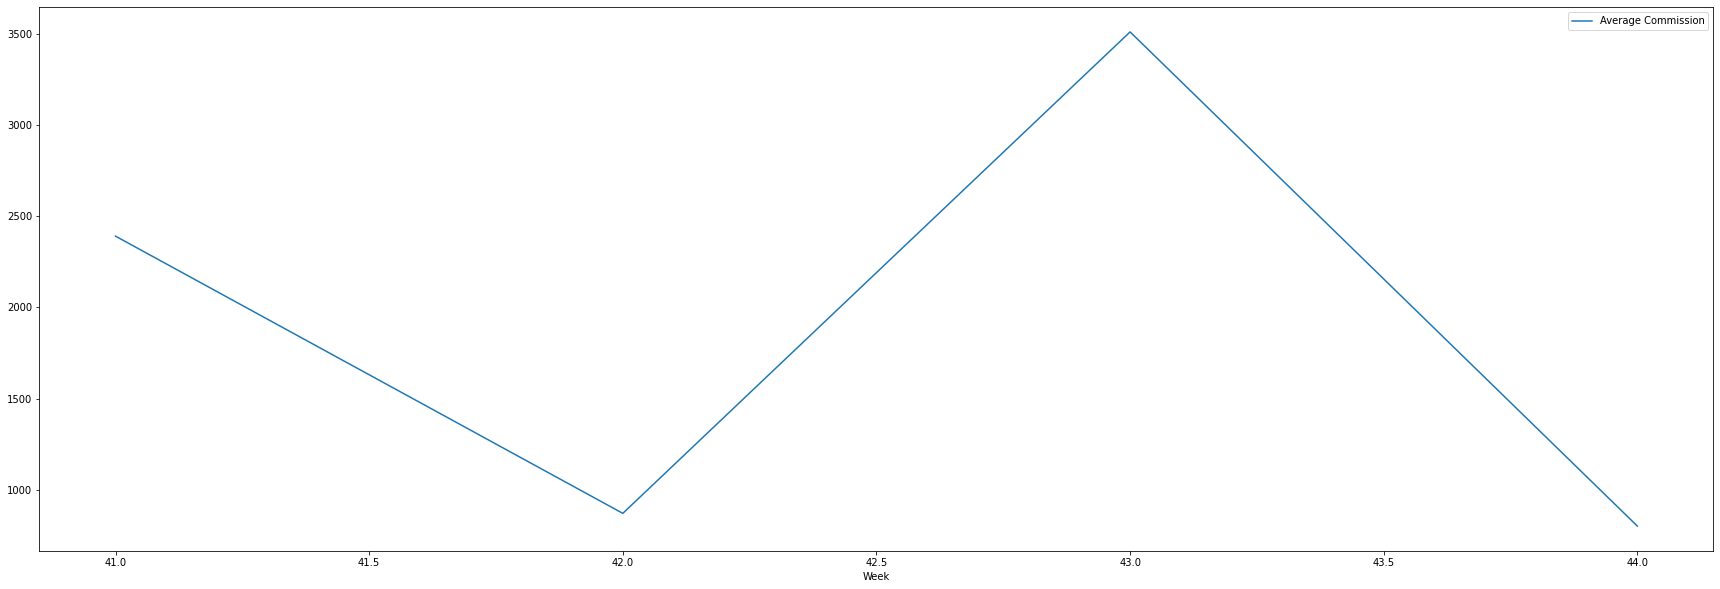

In [68]:
#getting the values for specific months
com_oct = com_mth[com_mth['Month']== 10]
com_oct = com_oct.sort_values(by='Week')
com_oct = com_oct.drop(columns=['Month'])
com_oct

#getting the values for each week
wk1 = com_oct[com_oct['Week']== 1]
wk1

wk2 = com_oct[com_oct['Week']== 2]
wk2

wk3 = com_oct[com_oct['Week']== 3]
wk3 

wk4 = com_oct[com_oct['Week']== 4]
wk4


d = {'Week': [41, 42, 43, 44], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

octAvgComm = pd.DataFrame(data=d)
octAvgComm
octAvg_graph = octAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [69]:
com_oct.min()
com_oct.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         0
Commision Earned               1.0
Value                           20
dtype: object

Week                           4
fscName             Wycliffe Bet
Category              Tarpaulins
Type                  Tarpaulins
Quantity                      98
Commision Earned        350000.0
Value                    8370000
dtype: object

In [70]:
#Find the number of services provided in the month for each type
com_oct.groupby('Type')['fscName'].nunique()

Type
Equipment                     2
Fertiizers                    4
Fertilizers                 123
Foliar                       70
Herbicide                    37
Hermetic                     34
Livestock Product            12
Other                         3
Pest And Desease Control     90
Sacks                         6
Seeds                        90
Tarpaulins                   22
Name: fscName, dtype: int64

# NOVEMBER <a class="anchor" id="nov"></a>

,Week,fscName,Category,Type,Quantity,Commision Earned,Value
5367,1,Bernard Oweke,Livestock Product,Livestock Product,200,200.0,1250
9368,1,Elder Mariamu Omurayi,Hermetic,Hermetic,25,750.0,5750
9369,1,Milka Akinyi,Hermetic,Hermetic,15,750.0,3750
4288,1,Milka Akinyi,Crop Protection,Pest And Desease Control,3,150.0,1950
2445,1,Bernard Oweke,Crop Protection,Pest And Desease Control,40,80.0,320
...,...,...,...,...,...,...,...
7672,4,Peter Kiragu,Crop Nutrition,Fertilizers,50,440.0,3250
7665,4,Stella Muthee,Crop Nutrition,Fertilizers,20,440.0,1300
3464,4,Joseph Marangu,Crop Protection,Pest And Desease Control,500,100.0,1100
8195,4,Martin Makokha,Crop Nutrition,Fertilizers,250,500.0,14500


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
5367,1,Bernard Oweke,Livestock Product,Livestock Product,200,200.0,1250
9368,1,Elder Mariamu Omurayi,Hermetic,Hermetic,25,750.0,5750
9369,1,Milka Akinyi,Hermetic,Hermetic,15,750.0,3750
4288,1,Milka Akinyi,Crop Protection,Pest And Desease Control,3,150.0,1950
2445,1,Bernard Oweke,Crop Protection,Pest And Desease Control,40,80.0,320
...,...,...,...,...,...,...,...
5994,1,Elizabeth Aoko Owiti,Crop Protection,Pest And Desease Control,5,250.0,3250
12924,1,Samuel Nyapola,Other Items,Other,5,9000.0,80000
10842,1,Nicholas Owiti,Seeds,Seeds,358,8950.0,98450
11144,1,Stella Muthee,Crop Protection,Pest And Desease Control,11,1650.0,11000


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
5149,2,Ciliah Muhoro,Crop Nutrition,Fertilizers,50,200.0,3000
5369,2,Samuel Nyapola,Crop Protection,Herbicide,4,200.0,3600
7560,2,Jane Odongo,Crop Nutrition,Fertilizers,1000,400.0,36000
7638,2,Jane Odongo,Hermetic,Hermetic,14,420.0,3220
5352,2,Samuel Otana Mawere,Crop Nutrition,Foliar,4,200.0,3800
...,...,...,...,...,...,...,...
9070,2,Stella Muthee,Crop Nutrition,Fertilizers,80,680.0,5600
2448,2,Stella Muthee,Crop Protection,Herbicide,1,80.0,350
8818,2,Stella Muthee,Crop Nutrition,Fertilizers,100,600.0,5700
9049,2,Dominic Okungu,Crop Protection,Herbicide,3,660.0,3150


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
877,3,David Okombo,Livestock Product,Livestock Product,50,30.0,150
878,3,Leanah Mwangi,Hermetic,Hermetic,5,30.0,1250
5204,3,Carren Sawo,Crop Nutrition,Fertilizers,25,200.0,1800
1097,3,Bernard Oweke,Crop Protection,Pest And Desease Control,40,40.0,250
4467,3,Pamella Odhiambo,Seeds,Seeds,6,30.0,3000
...,...,...,...,...,...,...,...
6825,3,Lucy Kaari,Crop Nutrition,Fertilizers,20,320.0,1000
11536,3,Justus Naitutae,Crop Nutrition,Foliar,20,2000.0,20000
6852,3,Mary Owacho,Crop Nutrition,Fertilizers,160,320.0,8000
6923,3,Stella Muthee,Crop Protection,Pest And Desease Control,2000,340.0,1100


,Week,fscName,Category,Type,Quantity,Commision Earned,Value
12762,4,Celina Kanyi,Crop Nutrition,Fertilizers,1200,6000.0,79200
2070,4,Leanah Mwangi,Crop Protection,Pest And Desease Control,100,60.0,360
1245,4,Joseph Marangu,Crop Nutrition,Fertilizers,25,50.0,1000
12684,4,Celina Kanyi,Crop Nutrition,Fertilizers,1100,5500.0,66000
2479,4,Judith Kiende,Seeds,Seeds,2000,12000.0,20000
...,...,...,...,...,...,...,...
7672,4,Peter Kiragu,Crop Nutrition,Fertilizers,50,440.0,3250
7665,4,Stella Muthee,Crop Nutrition,Fertilizers,20,440.0,1300
3464,4,Joseph Marangu,Crop Protection,Pest And Desease Control,500,100.0,1100
8195,4,Martin Makokha,Crop Nutrition,Fertilizers,250,500.0,14500


,Week,Average Commission
0,45,1409.438413
1,46,1389.707407
2,47,1234.085000
3,48,2810.711462


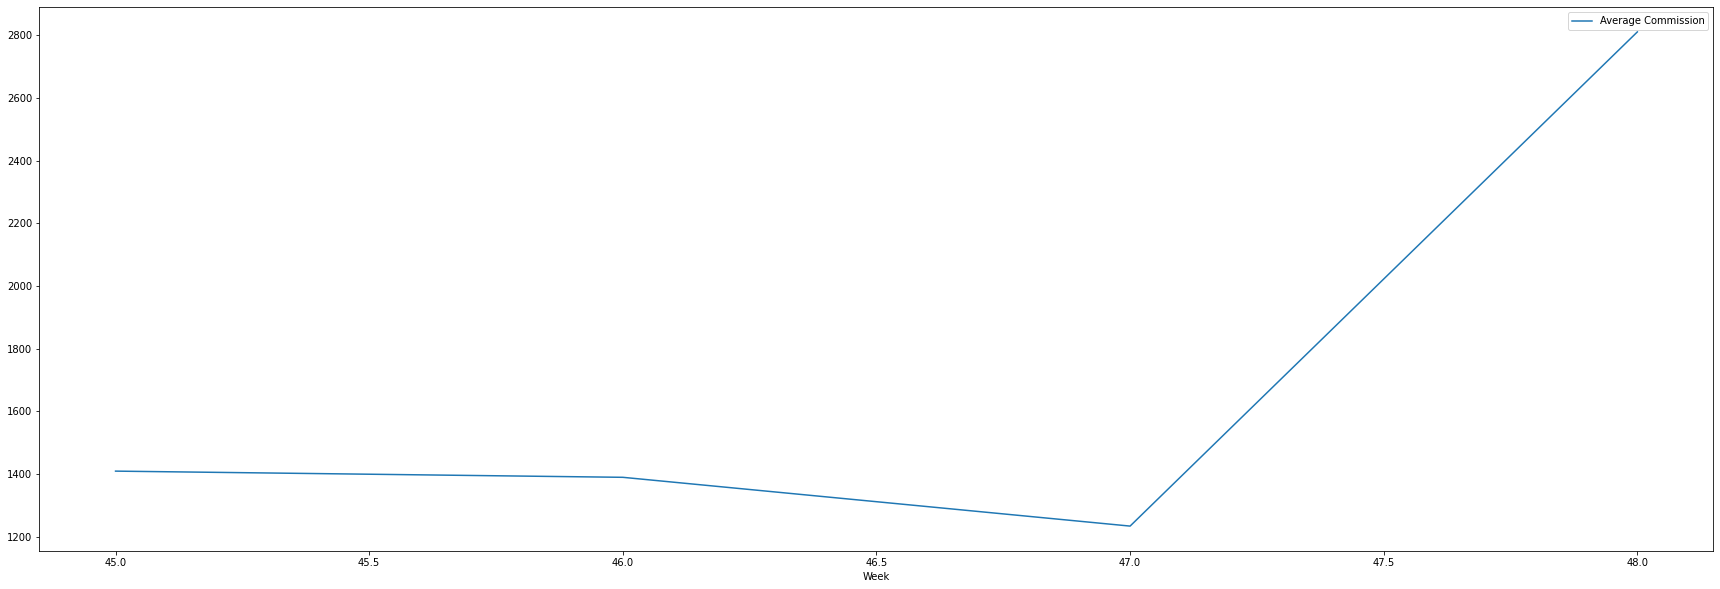

In [71]:
#getting the values for specific months
com_nov = com_mth[com_mth['Month']== 11]
com_nov = com_nov.sort_values(by='Week')
com_nov = com_nov.drop(columns=['Month'])
com_nov

#getting the values for each week
wk1 = com_nov[com_nov['Week']== 1]
wk1

wk2 = com_nov[com_nov['Week']== 2]
wk2

wk3 = com_nov[com_nov['Week']== 3]
wk3

wk4 = com_nov[com_nov['Week']== 4]
wk4



d = {'Week': [45,46,47,48], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

novAvgComm = pd.DataFrame(data=d)
novAvgComm
novAvg_graph = novAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [72]:
com_nov.min()
com_nov.max()

Week                             1
fscName             Abraham Nganga
Category            Crop Nutrition
Type                     Equipment
Quantity                         0
Commision Earned               1.0
Value                           20
dtype: object

Week                           4
fscName             Wycliffe Bet
Category              Tarpaulins
Type                  Tarpaulins
Quantity                      96
Commision Earned        325000.0
Value                    1950000
dtype: object

In [73]:
#Find the number of services provided in the month for each type
com_nov.groupby('Type')['fscName'].nunique()

Type
Equipment                     5
Fertilizers                 115
Foliar                       70
Herbicide                    34
Hermetic                     42
Livestock Product             6
Other                         3
Pest And Desease Control     90
Sacks                         5
Seeds                        57
Tarpaulins                   30
Name: fscName, dtype: int64

In [74]:
# FINAL QUARTER AVERAGE<a class="anchor" id="fiqa"></a>

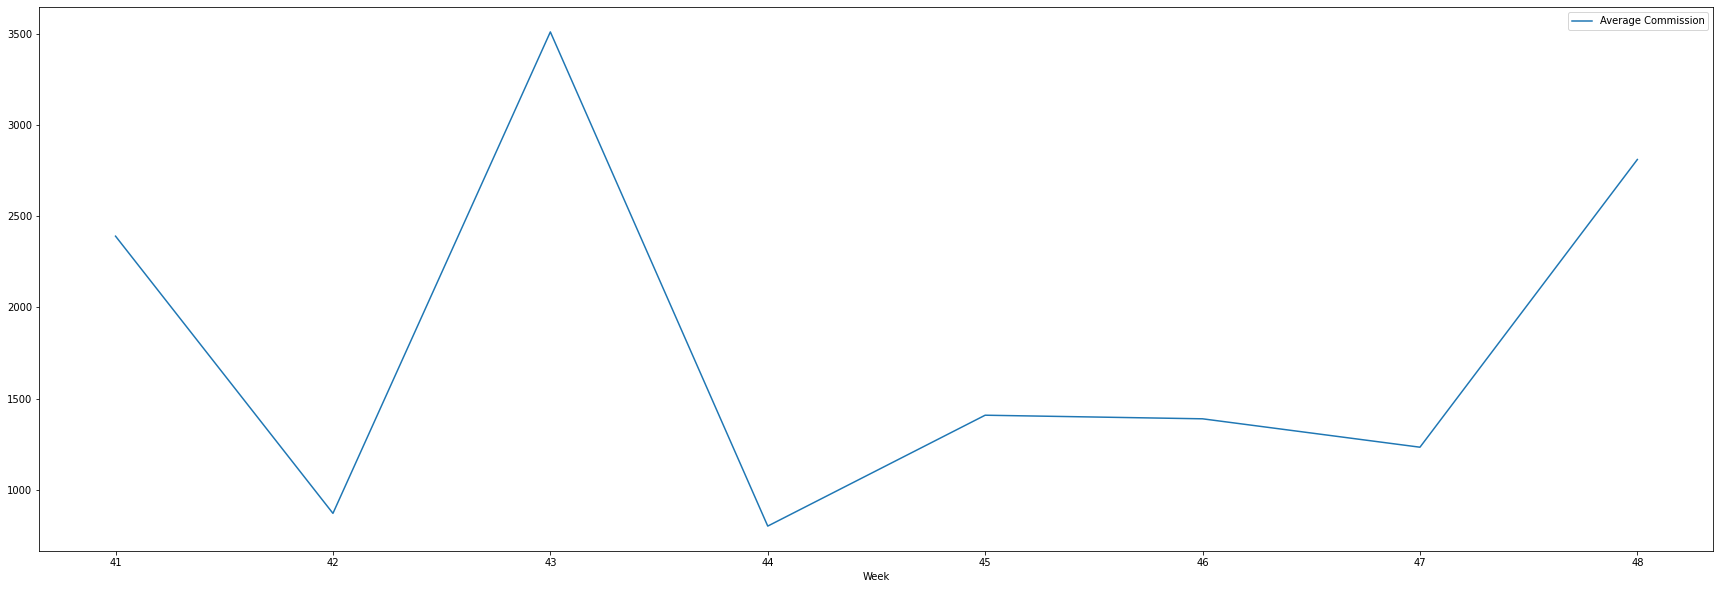

In [75]:
finQuarter = [octAvgComm, novAvgComm]

finQ = pd.concat(finQuarter)

finQgraph = finQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FULL YEAR AVERAGE<a class="anchor" id="fya"></a>

,Week,Average Commission
0,1,0.000000
1,2,498.214286
2,3,412.625000
3,4,585.919540
4,5,1574.469697
0,6,661.470588
1,7,1162.796875
2,8,1775.928571
3,9,6060.981982
0,10,987.097701


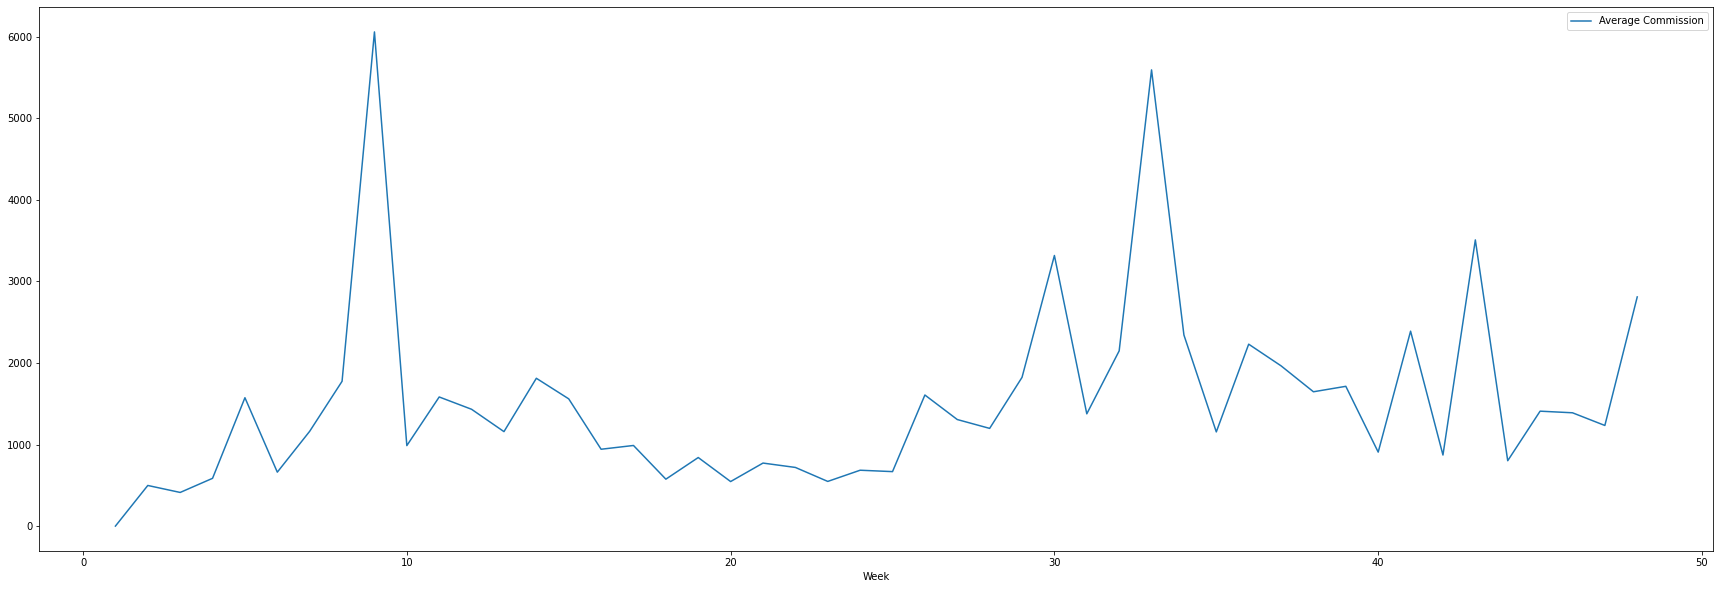

In [76]:
fya = pd.concat([janAvgComm, febAvgComm, marAvgComm, aprAvgComm, mayAvgComm, junAvgComm, julAvgComm, augAvgComm, sepAvgComm, octAvgComm, novAvgComm])
fya

fyaGraph = fya.plot.line(x='Week', y='Average Commission', figsize=(30,10))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Week', ylabel='Average Commission'>

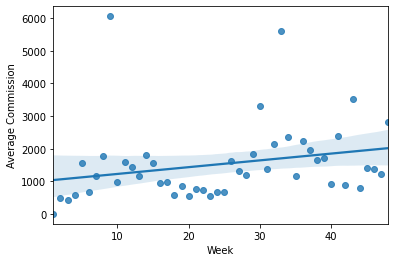

In [77]:
sns.regplot(fya['Week'],fya['Average Commission'])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Week', ylabel='Average Commission'>

(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Average Commission earned by FSC through the year (Inputs)')

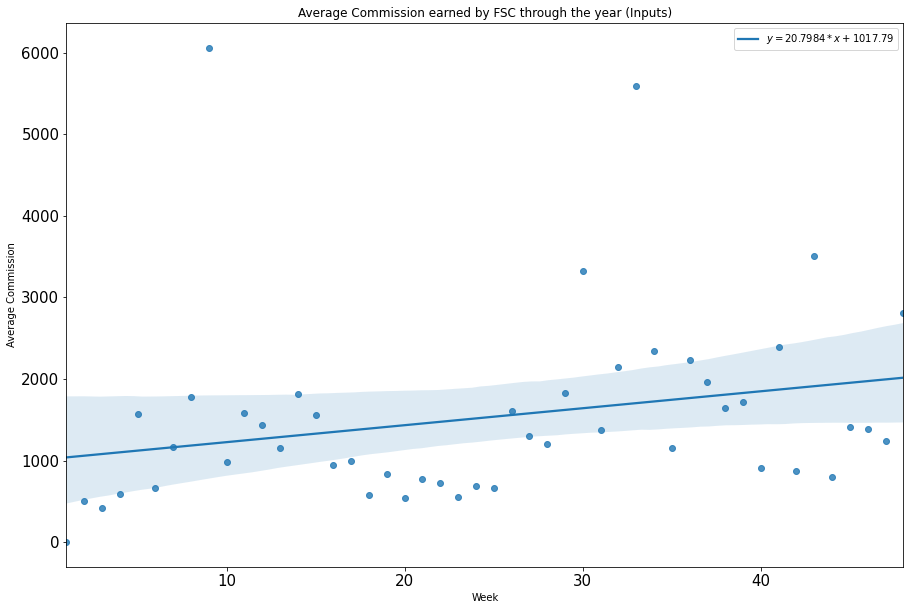

In [78]:
fig, ax = plt.subplots(figsize=(15,10))
slope, intercept, r_value, pv, se = stats.linregress(fya['Week'], fya['Average Commission'])
sns.regplot(fya['Week'], fya['Average Commission'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)
plt.title("Average Commission earned by FSC through the year (Inputs)")

In [79]:
fya

,Week,Average Commission
0,1,0.000000
1,2,498.214286
2,3,412.625000
3,4,585.919540
4,5,1574.469697
0,6,661.470588
1,7,1162.796875
2,8,1775.928571
3,9,6060.981982
0,10,987.097701
